<a href="https://colab.research.google.com/github/caxaxa/PhD_Empirics/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corruption and Collaborations: The Brazilian Example

In August 2013, Brazilian legislators enacted two important anti-bribery laws granting sanction reductions to collaborators. After this, in 2014 the Brazilian prosecutors initiated a series of big investigations unveiling big corruption schemes between the Brazilian government and important private corporations. In these cases, the prosecution strategy to investigate the defendants relied heavily on the offenders' disclosures under the newly enacted laws. In this context, one can argue that the investigations are evidence of the success of this anti-corruption policy. However, the impact of the policy over the widespread corruption in the country is not clear. This paper uses the empirical strategy from \cite{miller2009} to empirically test the effectiveness of the Brazilian policy against corruption. Results show that the policy was effective to both prosecute and deter corruption in Brazil.

In [1]:
!pip install  -U statsmodels
!pip install --upgrade matplotlib

# Reinitiate the kernel after updating the libraries

In [2]:
#Importing the libraries

import pandas as pd
import numpy as np




In [3]:
import matplotlib.pyplot as plt

In [4]:
# ## In case of using other crimes:

# df = pd.read_pickle('./Data/INQ_DATA.pkl')
# #creat a series of other crimes
# corruption = df.loc[(df['offences'].str.contains( 'corrup',case = False) ==True) & ((df['offences'].str.contains( 'ativa',case = False) ==True) | (df['offences'].str.contains( 'passiv',case = False) ==True)) ]
# corruption.to_pickle('./Data/Corruption.pkl')

In [5]:
# When using Colab, download the treated corruption data from my Git Repository

!mkdir Data
!mkdir Plottings
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/Corruption.pkl

mkdir: cannot create directory ‘Data’: File exists
mkdir: cannot create directory ‘Plottings’: File exists
--2024-12-27 00:49:07--  https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/Corruption.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979226 (956K) [application/octet-stream]
Saving to: ‘Corruption.pkl.1’

Corruption.pkl.1    100%[===================>] 956.28K  --.-KB/s    in 0.007s  

2024-12-27 00:49:08 (140 MB/s) - ‘Corruption.pkl.1’ saved [979226/979226]



## Exploring the Data

In [6]:
df_corruption = pd.read_pickle('./Corruption.pkl')
df_corruption

,offences,region,title
date,,,
2009-11-03,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AC,11.03.2009 - INQ 0007031-39.2014.4.01.3000 (JF...
2009-12-18,"SCI - Corrupção ativa, 5ª CCR - Corrupção ativa",AC,18.12.2009 - INQ 0015790-31.2010.4.01.3000 (JF...
2010-06-29,"SCI - Corrupção ativa, 5ª CCR - Corrupção ativa",AC,"29.06.2010 - INQ 00181/2010 (DPF/AC), PR-AC"
2010-07-10,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AC,07.10.2010 - INQ 0002501-94.2011.4.01.3000 (JF...
2009-03-02,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",AL,"03.02.2009 - INQ 2009.80.00.001342-8 (JF-AL, 7..."
...,...,...,...
2014-03-09,"SCI - Estelionato Majorado, 2ª CCR - Esteliona...",AL,03.09.2014 - INQ 0000077-93.2017.4.05.8000 (JF...
2014-05-27,"SCI - Estelionato Majorado, 2ª CCR - Esteliona...",MA,"27.05.2014 - INQ 00078/2014 (DPF/CAX), PRM-CAX..."
2014-03-18,"SCI - Corrupção passiva, 5ª CCR - Corrupção pa...",RN,18.03.2014 - IPL 0000544-41.2014.4.05.8400 (JF...


<ipython-input-7-0af8cb7d8cef>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_corruption.sort_index()['2011':'2019'].resample('Y').title.count().plot()


<Axes: xlabel='date'>

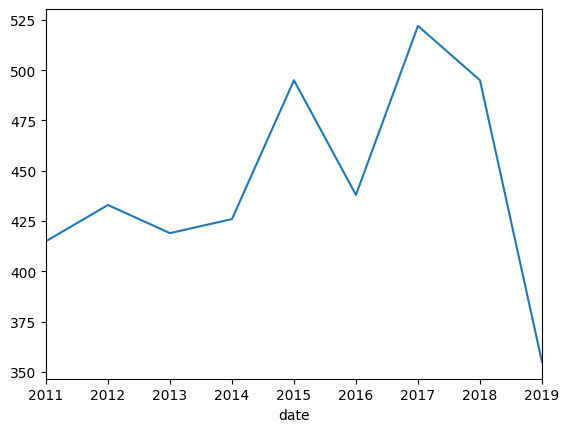

In [7]:
# Used the .sort_index() just to get rid off the deprecation warning
df_corruption.sort_index()['2011':'2019'].resample('Y').title.count().plot()

<ipython-input-8-524d466a6891>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_corruption.sort_index()['2011':'2019'].resample('M').title.count().plot()


<Axes: xlabel='date'>

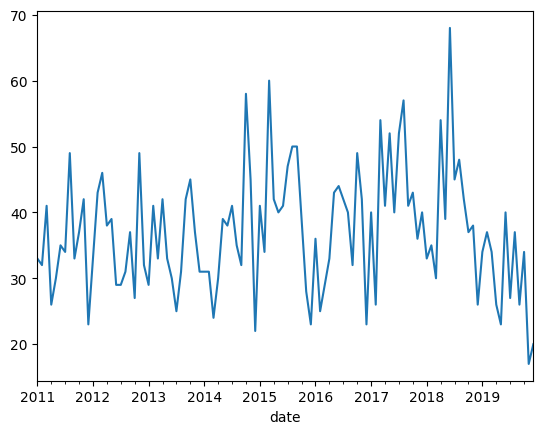

In [8]:
df_corruption.sort_index()['2011':'2019'].resample('M').title.count().plot()

<Axes: xlabel='date'>

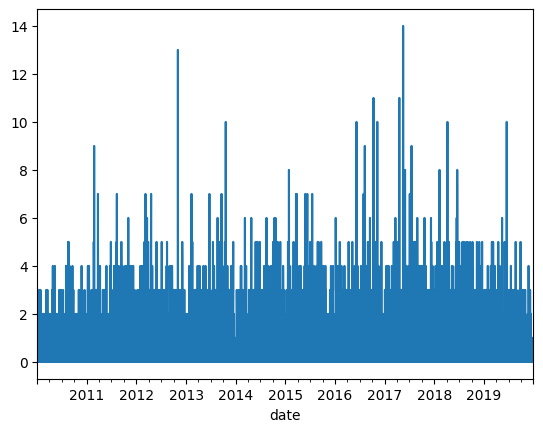

In [9]:
df_corruption.sort_index()['2010':'2019'].resample('D').title.count().plot()

In [10]:
states = pd.unique(df_corruption['region'])

In [11]:
# Ensure the DataFrame's index is a DatetimeIndex and sorted
df_corruption.index = pd.to_datetime(df_corruption.index)
df_corruption = df_corruption.sort_index()

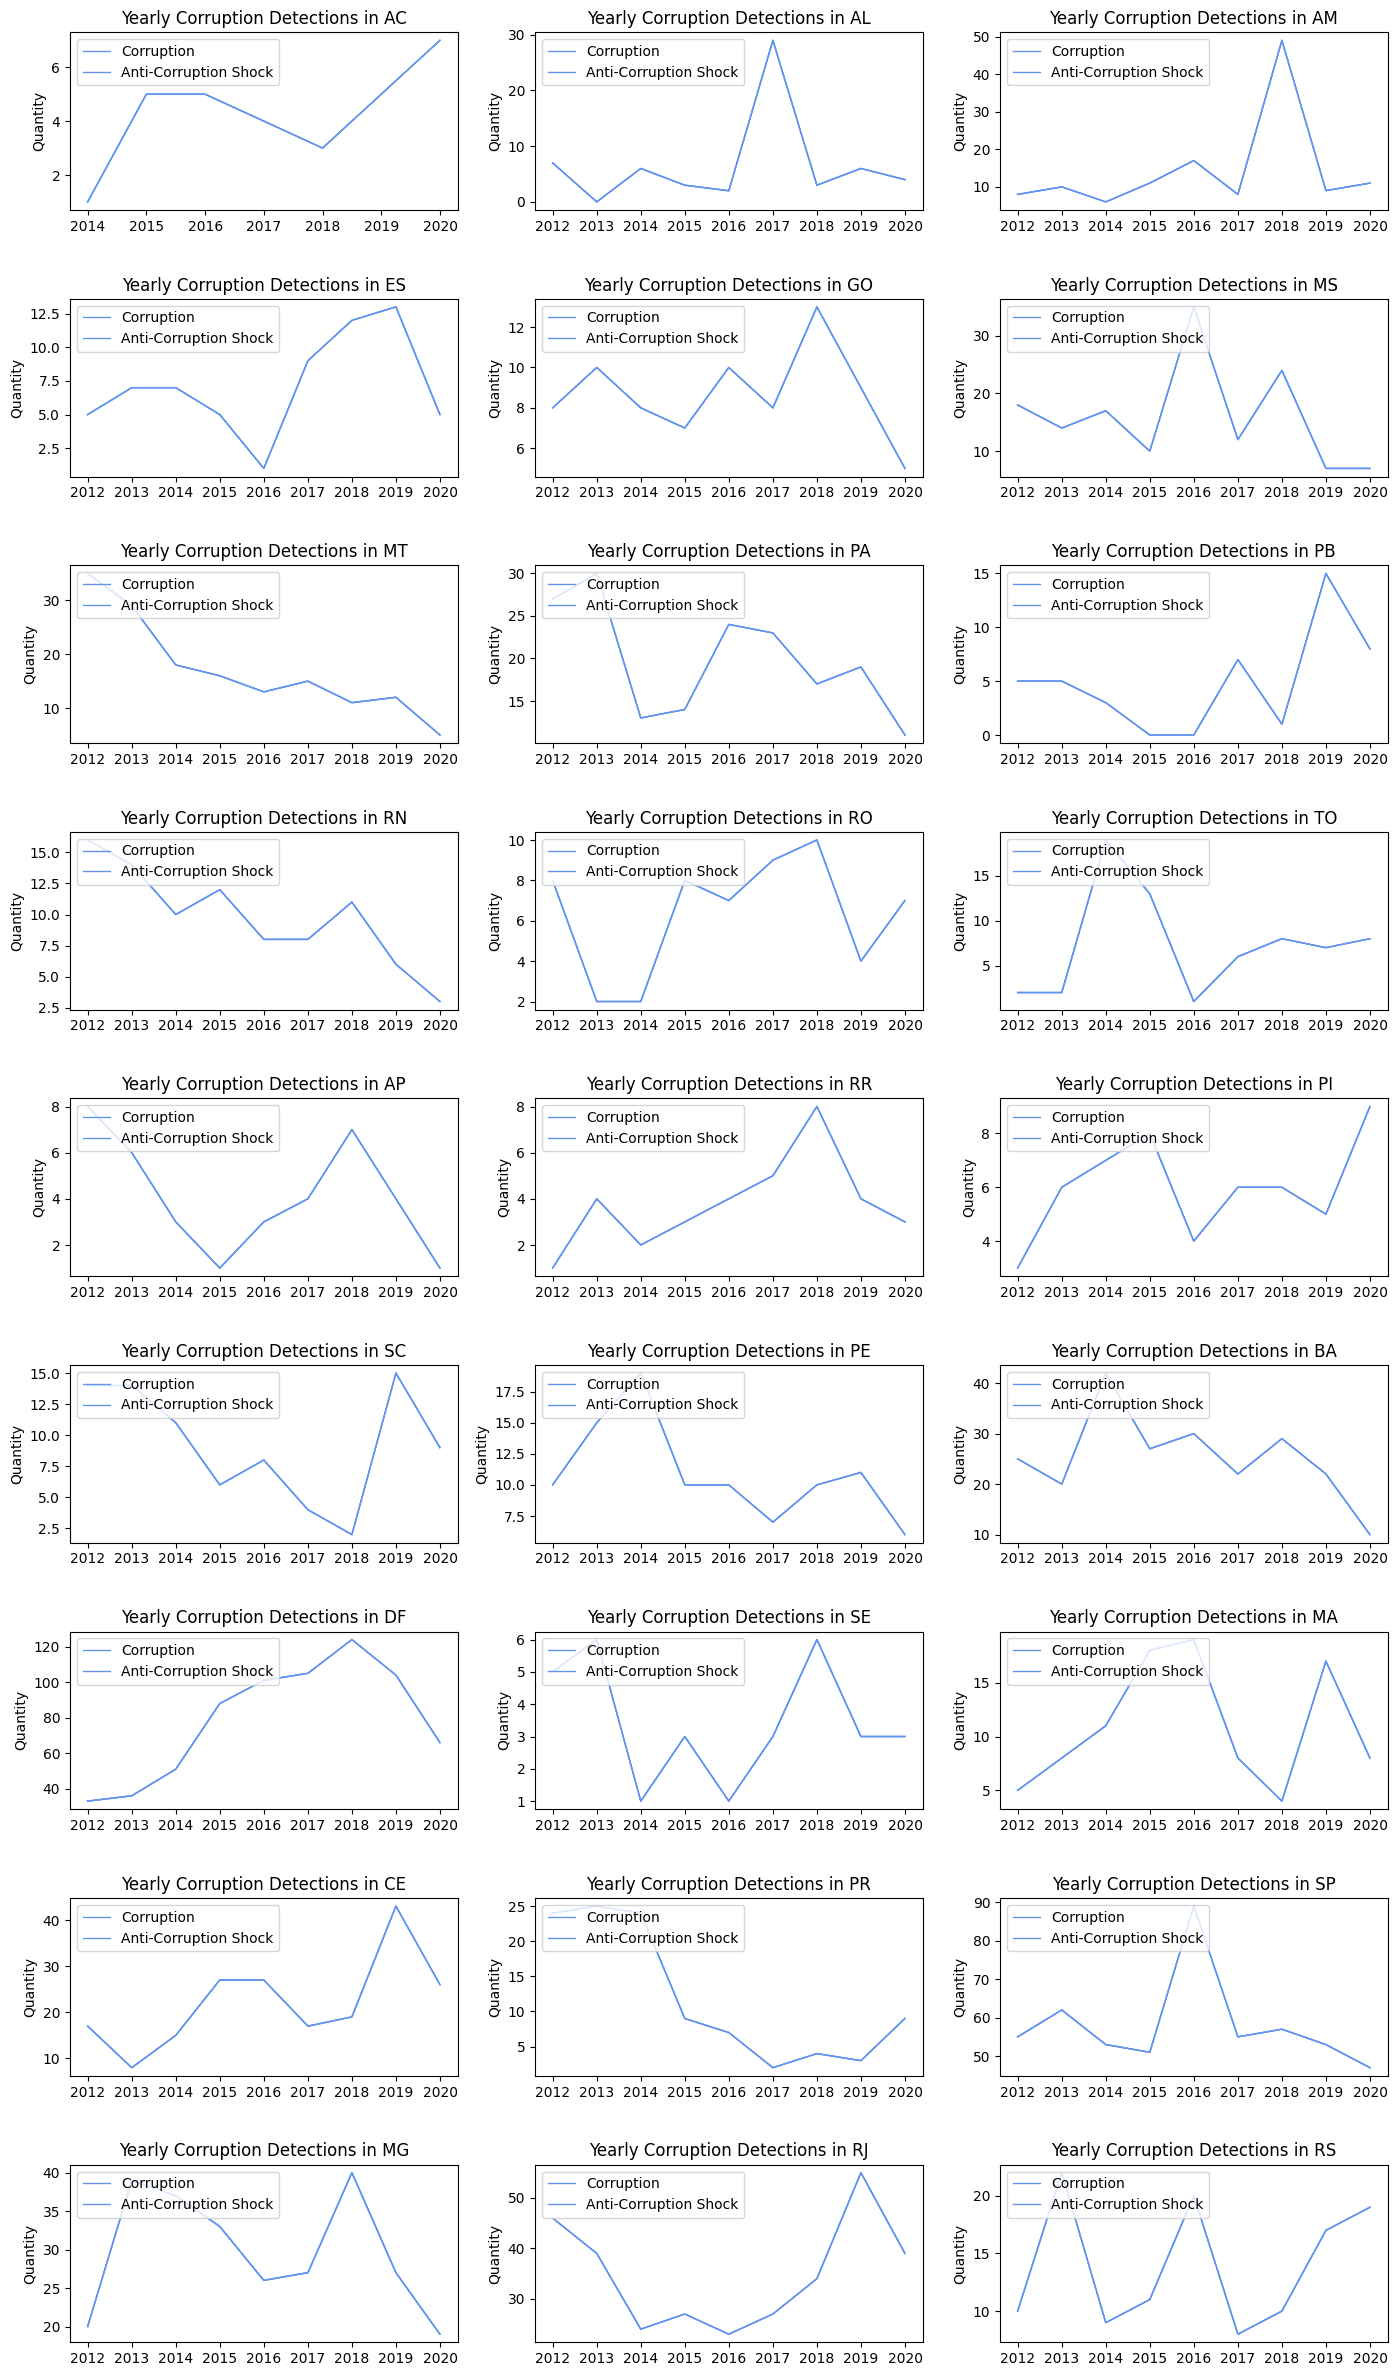

In [12]:
fig = plt.figure(figsize=(17,30))

fig.subplots_adjust(hspace = 0.5) # avoid x axis supperposition

for i in range(0,len(states),1):
    plt.subplot(int(len(states)/3),3,i+1)
    plt.plot((df_corruption['2011':'2019'].loc[df_corruption['2011':'2019']['region'].str.contains(states[i]) ==True].resample('YE').count()),color = 'cornflowerblue', lw = 1)
    #plt.axvline(2013, color='red', lw=1, alpha=1)
    plt.legend(('Corruption','Anti-Corruption Shock'),loc=2)
    #plt.xlabel('Years')
    plt.ylabel('Quantity')
    plt.title('Yearly Corruption Detections in ' + states[i])
plt.show()
#fig.savefig('./Plottings/states.pdf', transparent= True)

# Empirical Strategy

1 - Based on Miller (2009), I'll try to fit a polinomial curve after the relevant schok; and

2 - Run a best fit regresion (lowess) in the entire set and check if there are points of spike and long term decrease

## 1 - Corruption Deterrence Empirical Model


Following Berlin, Qin and Spagnolo (2018) , a possible OLS regression (Poisson Regression) using feasible data from the Brazilian Federal Police of initiated investigations of corruption as dependent variable $Y$ can be expressed by:

$$Y_{t}=\beta_{0}+\beta_1 D_t+ \beta _2 T1^{n}_{t}+ \beta _3 T2^{n}_{t} + \beta_4 X_{t} + \varepsilon_{t}$$

For,

$t$= Month after January 2009; and

$n$= Order of the intended tested polynomial.


Where

$Y_{t}$= Number of initiated investigations for corruption crimes (Or corruption Related Crimes);

$D_t$= Dummy for the impact of the enforcements, being 0 before August 2013 and 1 after;

$T1$= Time effect of all sample. Being 1 at the first observation 2 at the next and so on;

$T2$= Time effect from the beginning of the enforcement shock. Being 1 after august 2013, 2 in the next month and so on; and

$\varepsilon_{it}$= Is the error from functional predictions, it is expected to be normally distributed and i.i.d.


In order to test different shaped polynomials that might fit the expected detection curve,  the variables $T1$ and $T2$ can be tested on different order polynomials to check different goodness of fit.

In [13]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.summary2 import summary_col

!pip install Stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

### Yearly Regressions

In [14]:
#Yearly Variables
#Creating the yearly dataframe
ydf = df_corruption['2011':'2019'].resample('Y').count()

ydf['cons'] = 1


# creat a dummy with 0 before 2013 and 1 after #
dummy = []
for i in (range(2010,2019)):
    if i < 2014:
        dummy.append(0)
    else:
        dummy.append(1)

ydf['dummy'] = dummy
ydf['year'] = range(2011,2020,1)
# creat a list of 1 to 10#
yt1 = list(range(1,10))

ydf['t1'] = yt1


# creat a polynomial root after 2013#
yt2= []                  # creat a polynom root after 2013#
for i in (range(2010,2019)):
    if i < 2015:
        yt2.append(0)
    else:
        yt2.append(i-2015)
ydf['t2'] = yt2

# Creating the higher order polynoms

ydf['s1'] = np.power(yt1,2)
ydf['c1'] = np.power(yt1,3)
ydf['s2'] = np.power(yt2,2)
ydf['c2'] = np.power(yt2,3)
ydf['q2'] = np.power(yt2,3)
ydf['f2'] = np.power(yt2,3)


<ipython-input-14-88a99ee9ecdc>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ydf = df_corruption['2011':'2019'].resample('Y').count()


In [15]:
ydf.head(20)

,offences,region,title,cons,dummy,year,t1,t2,s1,c1,s2,c2,q2,f2
date,,,,,,,,,,,,,,
2011-12-31,415,415,415,1,0,2011,1,0,1,1,0,0,0,0
2012-12-31,433,433,433,1,0,2012,2,0,4,8,0,0,0,0
2013-12-31,419,419,419,1,0,2013,3,0,9,27,0,0,0,0
2014-12-31,426,426,426,1,0,2014,4,0,16,64,0,0,0,0
2015-12-31,495,495,495,1,1,2015,5,0,25,125,0,0,0,0
2016-12-31,438,438,438,1,1,2016,6,0,36,216,0,0,0,0
2017-12-31,522,522,522,1,1,2017,7,1,49,343,1,1,1,1
2018-12-31,495,495,495,1,1,2018,8,2,64,512,4,8,8,8
2019-12-31,355,355,355,1,1,2019,9,3,81,729,9,27,27,27


In [16]:
#CORRUPTION ONLY
results1 = sm.OLS(ydf['offences'], ydf[['cons','dummy']]).fit()
results2 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2','s2','c2','q2','f2']]).fit()
results3 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2','s1','s2']]).fit()
results4 = sm.OLS(ydf['offences'], ydf[['cons','dummy','t1','t2','s2','c2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['cons','dummy'])
HTML(stargazer.render_html())

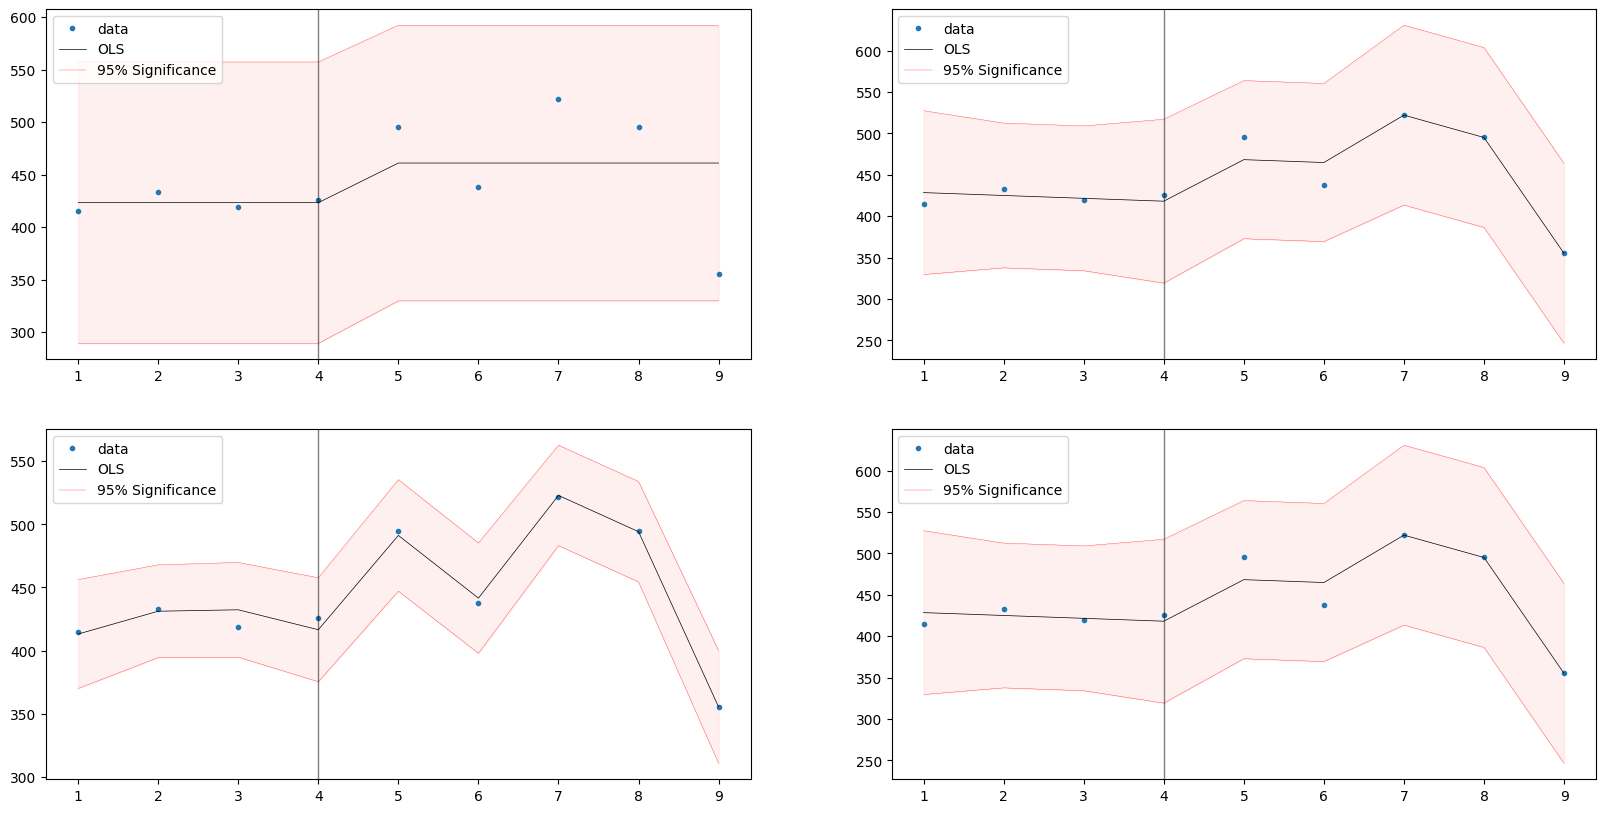

In [17]:

fig = plt.figure(figsize=(20,10))

result_list = [results1,results2,results3,results4]
theta = 4

for i in range(len(result_list)):
  plt.subplot(2,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( ydf['t1'], ydf['offences'], '.',lw=1)
  plt.plot(ydf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(ydf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( ydf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( ydf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

#fig.savefig('emp3.pdf')

### Monthly Regressions

In [18]:
#Monthly

mdf = df_corruption['2011':'2019'].resample('M').count()

#create a constant

mdf['cons'] = 1


# creat a dummy with 0 before feb 2014 (x months) and 1 after # Change this to better fit### Lava Jato 17/marco
intervention = 42

dummy = []
for i in (range(0,len(mdf))):
    if i <intervention:
        dummy.append(0)
    else:
        dummy.append(1)

mdf['dummy'] = dummy

# creat a list of 1 to 13#
t1 = list(range(0,len(mdf)))

mdf['t1'] = t1

# creat a polynom root after 2013#
t2= []
for i in (range(0,len(mdf))):
    if i < intervention:
        t2.append(0)
    else:
        t2.append(i-intervention)

mdf['t2'] = t2

#Creating other orther polynomials

mdf['s1'] = np.power(t1,2)
mdf['c1'] = np.power(t1,3)
mdf['s2'] = np.power(t2,2)
mdf['c2'] = np.power(t2,3)
mdf['q1'] = np.power(t1,4)
mdf['f1'] = np.power(t1,5)
mdf['q2'] = np.power(t2,4)
mdf['f2'] = np.power(t2,5)

mdf = mdf.fillna(0)


<ipython-input-18-b9a9b318dd5c>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mdf = df_corruption['2011':'2019'].resample('M').count()


In [19]:
mdf.head(5)

,offences,region,title,cons,dummy,t1,t2,s1,c1,s2,c2,q1,f1,q2,f2
date,,,,,,,,,,,,,,,
2011-01-31,33,33,33,1,0,0,0,0,0,0,0,0,0,0,0
2011-02-28,32,32,32,1,0,1,0,1,1,0,0,1,1,0,0
2011-03-31,41,41,41,1,0,2,0,4,8,0,0,16,32,0,0
2011-04-30,26,26,26,1,0,3,0,9,27,0,0,81,243,0,0
2011-05-31,30,30,30,1,0,4,0,16,64,0,0,256,1024,0,0


In [20]:
#  Corruption
results1 = sm.OLS(mdf['offences'], mdf[['cons','dummy']]).fit()
results2 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2']]).fit()
results3 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2']]).fit()
results4 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2']]).fit()
results5 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2']]).fit()
results6 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','q2','f2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['cons','dummy','t2','s2','c2','q2','f2'])
HTML(stargazer.render_html())

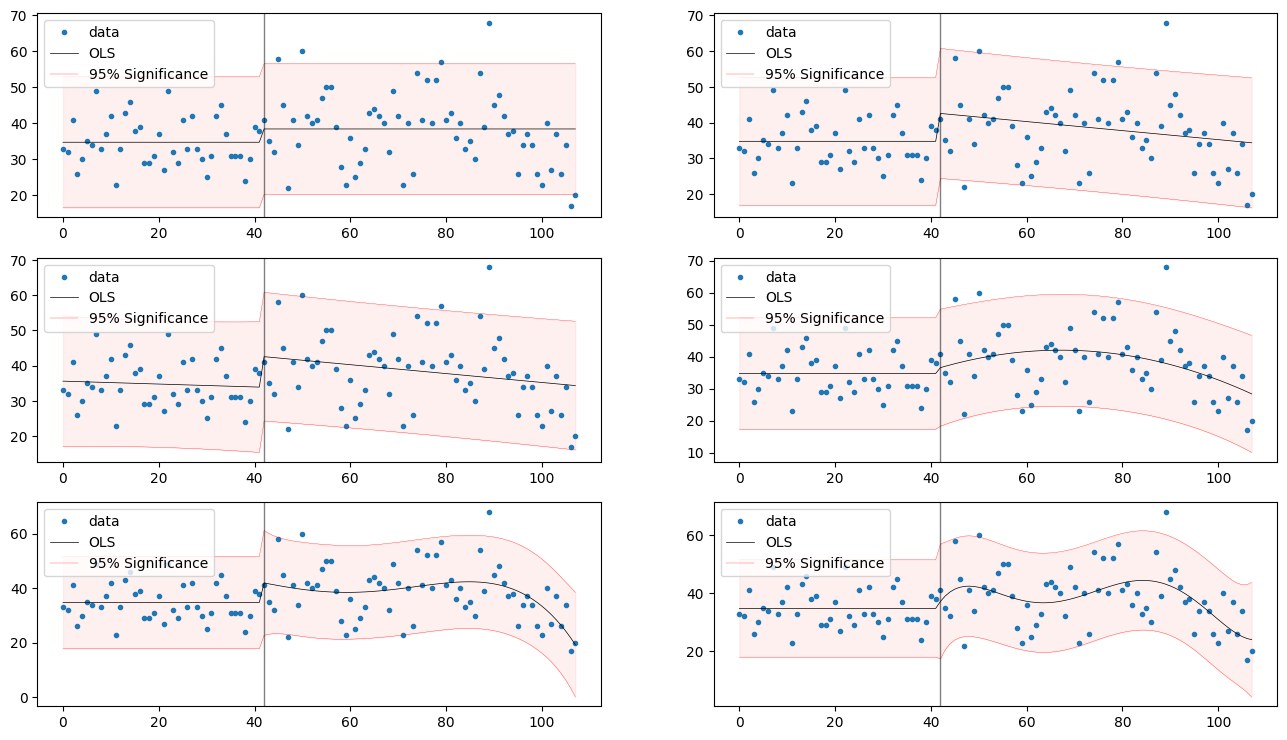

In [21]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

In [22]:
#  Corruption
#
results1 = sm.Poisson(mdf['offences'], mdf[['cons','dummy']]).fit()
results2 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1']]).fit()
results3 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2']]).fit()
results4 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','t2']]).fit()
results5 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','s2']]).fit()
results6 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','s1','t2','s2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['cons','dummy','t1','t2','s1','s2'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 3.789512
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.745613
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.743470
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.742067
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.677123
         Iterations 9
Optimization terminated successfully.
         Current function value: 3.673260
         Iterations 20


In [23]:
results5.params

,0
cons,3.548522
dummy,0.046963
t2,0.011806
s2,-0.000236


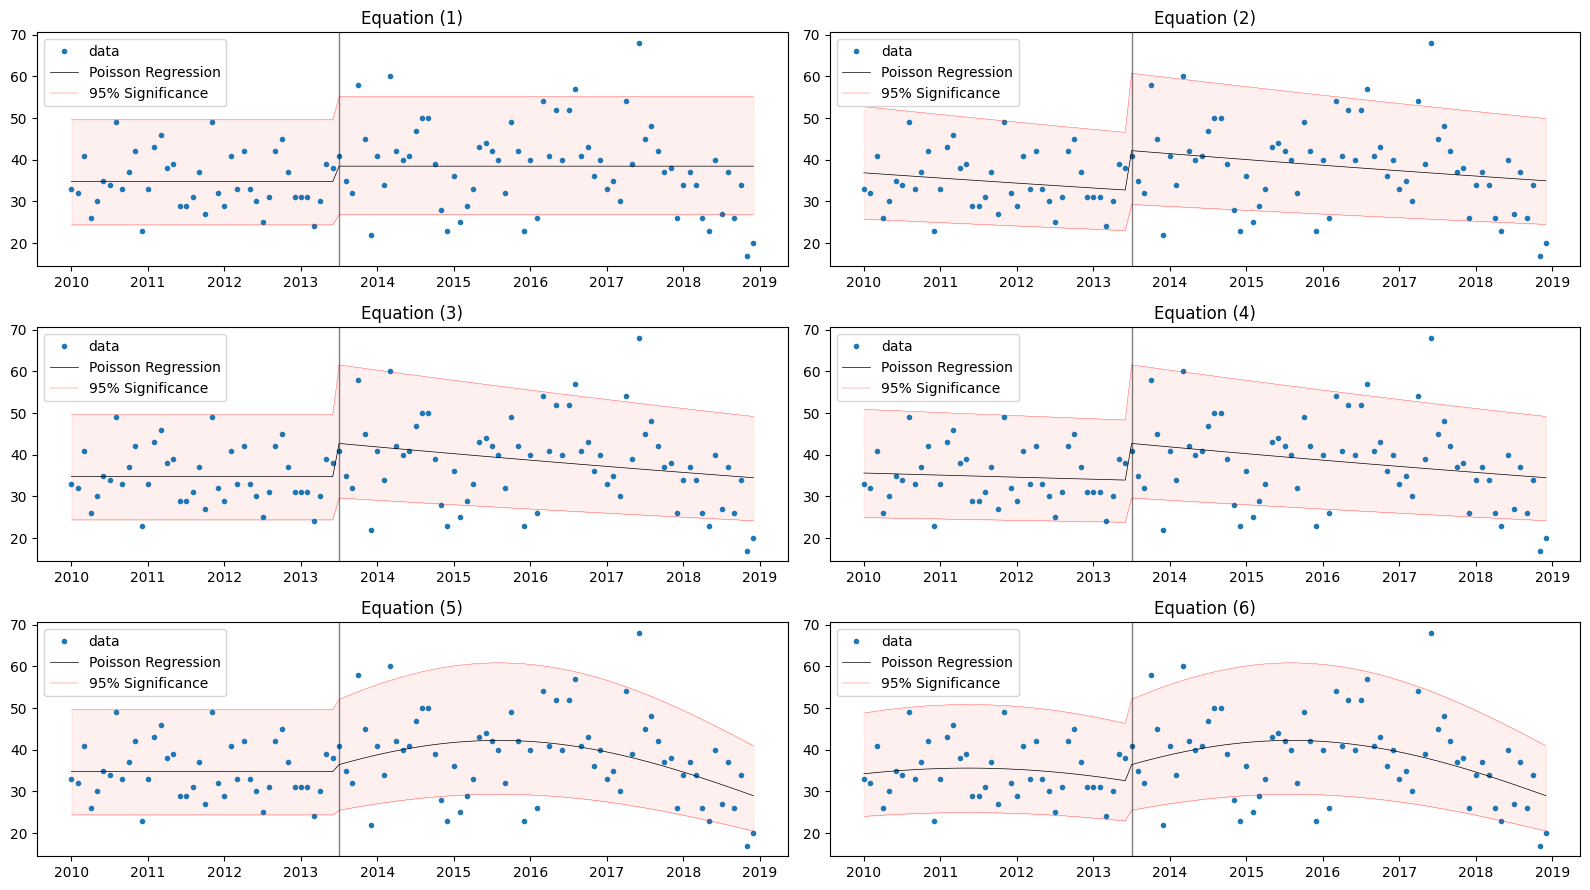

In [24]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.title('Equation ({})'.format(str(i+1)))
  plt.xticks(np.arange(0, len(mdf) +1 , step=len(mdf)/9), np.arange(2010,2020,1))  # Set label locations.
  plt.tight_layout()
  plt.legend(('data','Poisson Regression','95% Significance'),loc=2)
  #fig.savefig('emp3.pdf')

plt.show()

# Multivariable Regressions

Adding, GDP growth, Unemployment rate and onther variables.

Adding state fixed effects.

In [25]:
#Download the data from my Github Repo
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/GDP.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/unemployment2.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/interest_rate.csv
!wget https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/IPCA.csv

--2024-12-27 00:49:40--  https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/GDP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2117 (2.1K) [text/plain]
Saving to: ‘GDP.csv.1’

GDP.csv.1           100%[===================>]   2.07K  --.-KB/s    in 0s      

2024-12-27 00:49:40 (37.7 MB/s) - ‘GDP.csv.1’ saved [2117/2117]

--2024-12-27 00:49:40--  https://raw.githubusercontent.com/caxaxa/PhD_Empirics/main/Data/unemployment2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2362 (2.3K) [text/plain]
Saving to: ‘unem

In [26]:
# CSV dowloaded from 'ipeadata.gov.br' *Fonte: IPEA * Last trim expected
tgdp = pd.read_csv('./GDP.csv')

tgdp = tgdp.rename(columns={ 'PIB - preços de mercado - var. real trim. - (%) - Instituto Brasileiro de Geografia e Estatística- Sistema de Contas Nacionais Trimestrais (IBGE/SCN Trimestral) - SCN104_PIBPMG104': 'gdp'})
tgdp = pd.DataFrame(tgdp)
#dropting uncessary columns
tgdp = tgdp.drop(['Data'], axis=1)

tgdp = tgdp/100
#creating the date column in datetime format:
tgdp['date'] = pd.date_range('1996-01-01','2020-01-01', freq='Q')

#setting a date index:
tgdp = tgdp.set_index('date')


#Arranging the data to fit Multivariate Monthly regression:
# taking average of quarterly growth to monthly observations: (other possible method is .pad() insted of .bfill())
mdf['gdp'] = tgdp['2008-12-01':'2019'].resample('M', closed = 'left').bfill()

#mdf['l_gdp'] = mdf['l_gdp'].fillna(method = 'bfill')

#Create a Lagged gdp vaariable for robustness check

mdf['l_gdp'] = tgdp['2007-12-01':'2018'].resample('M', closed = 'left').bfill()


mdf['l_gdp'] = mdf['l_gdp'].fillna(method = 'ffill')






<ipython-input-26-ff2386654527>:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  tgdp['date'] = pd.date_range('1996-01-01','2020-01-01', freq='Q')
<ipython-input-26-ff2386654527>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mdf['gdp'] = tgdp['2008-12-01':'2019'].resample('M', closed = 'left').bfill()
<ipython-input-26-ff2386654527>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mdf['l_gdp'] = tgdp['2007-12-01':'2018'].resample('M', closed = 'left').bfill()
<ipython-input-26-ff2386654527>:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mdf['l_gdp'] = mdf['l_gdp'].fillna(method = 'ffill')


In [27]:
# CSV dowloaded from 'ipeadata.gov.br' IBGE PNAD -CORREC FOR BEFORE 2012 from SEAD
unemployment = pd.read_csv('./unemployment2.csv')

unemployment = unemployment.rename(columns={ 'Taxa de desocupação - (%) - Instituto Brasileiro de Geografia e Estatística- Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_TDESOC12': 'unemployment'})
unemployment = pd.DataFrame(unemployment)
#dropting uncessary columns
unemployment = unemployment.drop(['Unnamed: 2','Data'],axis = 1)

unemplyment = unemployment/100
#creating the date column in datetime format:
unemployment['date'] = pd.date_range('2009','2020', freq='M')

#setting a date index:
unemployment = unemployment.set_index('date')

mdf['unemployment'] = unemployment['2009':'2020'].resample('M').sum()

mdf['l_unemployment'] = unemployment['2008':'2019'].resample('M').sum()





<ipython-input-27-2bb0e7a25316>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  unemployment['date'] = pd.date_range('2009','2020', freq='M')
<ipython-input-27-2bb0e7a25316>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mdf['unemployment'] = unemployment['2009':'2020'].resample('M').sum()
<ipython-input-27-2bb0e7a25316>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mdf['l_unemployment'] = unemployment['2008':'2019'].resample('M').sum()


In [28]:
# CSV dowloaded from 'ipeadata.gov.br'
interest = pd.read_csv('./interest_rate.csv')

interest = interest.rename(columns={ 'Taxa de juros - Over / Selic - (% a.m.) - Banco Central do Brasil- Boletim- Seção mercado financeiro e de capitais (Bacen/Boletim/M. Finan.) - BM12_TJOVER12': 'interest'})
interest = pd.DataFrame(interest)
#dropting uncessary columns
interest = interest.drop(['Unnamed: 2','Data'],axis = 1)
interes = interest/100

#creating the date column in datetime format:
interest['date'] = pd.date_range('1973-12-01','2020-02-01', freq='M')

#setting a date index:
interest = interest.set_index('date')

mdf['interest'] = interest['2009':'2020'].resample('M').sum()

mdf['l_interest'] = interest['2008':'2019'].resample('M').sum()

<ipython-input-28-07b2c26d0cfc>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  interest['date'] = pd.date_range('1973-12-01','2020-02-01', freq='M')
<ipython-input-28-07b2c26d0cfc>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mdf['interest'] = interest['2009':'2020'].resample('M').sum()
<ipython-input-28-07b2c26d0cfc>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mdf['l_interest'] = interest['2008':'2019'].resample('M').sum()


In [29]:
# CSV dowloaded from 'ipeadata.gov.br'
inflation = pd.read_csv('./IPCA.csv')

inflation = inflation.rename(columns={ 'Inflação - IPCA - (% a.m.) - Instituto Brasileiro de Geografia e Estatística- Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_IPCAG12': 'interest'})
inflation = pd.DataFrame(inflation)
#dropting uncessary columns
inflation = inflation.drop(['Unnamed: 2','Data'],axis = 1)
inflation = inflation/100

#creating the date column in datetime format:y
inflation['date'] = pd.date_range('1979-12-01','2020-01-01', freq='M')

#setting a date index:
inflation = inflation.set_index('date')

mdf['inflation'] = inflation['2008-12-01':'2019'].resample('M').sum()

mdf['l_inflation'] = inflation['2007-12-01':'2018'].resample('M').sum()


<ipython-input-29-be73d51472a9>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  inflation['date'] = pd.date_range('1979-12-01','2020-01-01', freq='M')
<ipython-input-29-be73d51472a9>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mdf['inflation'] = inflation['2008-12-01':'2019'].resample('M').sum()
<ipython-input-29-be73d51472a9>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mdf['l_inflation'] = inflation['2007-12-01':'2018'].resample('M').sum()


In [30]:
# Creating Real Interest Variable

mdf['real_interest'] = mdf['inflation']*(mdf['interest']+1)


mdf['l_real_interest'] = mdf['l_inflation']*(mdf['l_interest']+1)


In [31]:
mdf = mdf.fillna(0)

In [32]:
#regressing


results1 = sm.OLS(mdf['offences'], mdf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
results3 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','s1','c1','t2','s2','c2','gdp','unemployment','real_interest']]).fit()
results4 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','gdp','unemployment','real_interest']]).fit()
results5 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','q2','gdp','unemployment','real_interest']]).fit()
results6 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','f2','gdp','unemployment','real_interest']]).fit()
model_list = [results1, results2,results3,results4,results5,results6]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

In [33]:
# print(stargazer.render_latex())

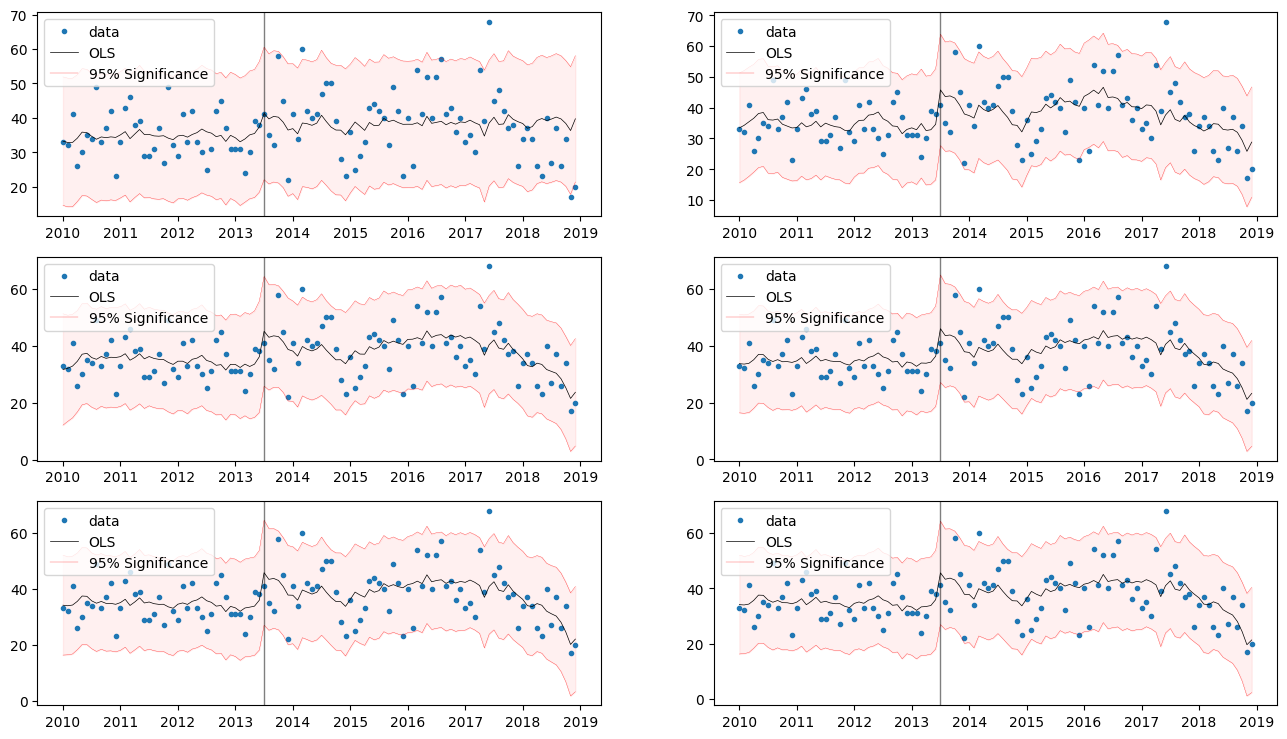

In [34]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.xticks(np.arange(0, len(mdf) +1 , step=len(mdf)/9), np.arange(2010,2020,1))  # Set label locations.
  plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

#fig.savefig('emp3.pdf')

In [35]:

from scipy import stats

results_list = []

# Assuming you have a list of OLS models in model_list
for model in model_list:

    # Get fitted values
    fitted_values = model.fittedvalues

    # Extract fitted values
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]

    # Difference between pre-policy and last fitted values (not a Z-test)
    difference = last_fitted_value - pre_policy_fitted_value

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store the results along with the fitted values and goodness-of-fit measures
    results_list.append((pre_policy_fitted_value, last_fitted_value, difference, aic, bic, log_likelihood))

# Display the results
for i, (pre_policy_value, last_value, difference, aic, bic, log_likelihood) in enumerate(results_list, start=1):
    print(f'Model {i}: Pre-policy fitted value = {pre_policy_value}, Last fitted value = {last_value}, Difference = {difference}, AIC = {aic}, BIC = {bic}, Log-Likelihood = {log_likelihood}')


Model 1: Pre-policy fitted value = 37.38765058899237, Last fitted value = 39.74032288055173, Difference = 2.352672291559358, AIC = 788.8677228796058, BIC = 802.278379015227, Log-Likelihood = -389.4338614398029
Model 2: Pre-policy fitted value = 34.59680621737989, Last fitted value = 28.804235457681497, Difference = -5.792570759698396, AIC = 775.8652389644428, BIC = 794.6401575543124, Log-Likelihood = -380.9326194822214
Model 3: Pre-policy fitted value = 36.12984693530574, Last fitted value = 23.66256425606778, Difference = -12.467282679237965, AIC = 778.5925910503998, BIC = 808.0960345487663, Log-Likelihood = -378.2962955251999
Model 4: Pre-policy fitted value = 36.319623614332045, Last fitted value = 23.255032229724932, Difference = -13.064591384607112, AIC = 773.3310782206929, BIC = 794.7881280376866, Log-Likelihood = -378.66553911034646
Model 5: Pre-policy fitted value = 35.94668355523395, Last fitted value = 22.03605683636267, Difference = -13.910626718871285, AIC = 774.45869257423

In [36]:

# Assuming 'model_list' and 'intervention' are defined
results_list = []

for model in model_list:
    # Get fitted values
    fitted_values = model.fittedvalues

    # Get standard errors of the fitted values
    predictions = model.get_prediction()
    predict_std_err = predictions.se_mean

    # Extract fitted values and their standard errors
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]
    last_se = predict_std_err[-1]
    pre_policy_se = predict_std_err[intervention - 1]

    # Calculate the standard error of the difference
    diff_se = np.sqrt(last_se**2 + pre_policy_se**2)

    # Calculate the observed difference
    observed_diff = last_fitted_value - pre_policy_fitted_value

    # t-test for the difference
    t_stat = observed_diff / diff_se
    df = len(fitted_values) - len(model.params)  # degrees of freedom
    p_value = 2 * stats.t.sf(np.abs(t_stat), df)

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store results
    results_list.append([pre_policy_fitted_value, last_fitted_value, observed_diff, p_value, aic, bic, log_likelihood])

# Create DataFrame
results_df = pd.DataFrame(results_list, columns=['Pre-policy Value', 'Last Value', 'Difference', 'P-value', 'AIC', 'BIC', 'Log-Likelihood'])

# Add Model numbers
results_df.index = [f'Model {i+1}' for i in range(len(results_df))]

# Display the DataFrame
print(results_df)


         Pre-policy Value  Last Value  Difference   P-value         AIC  \
Model 1         37.387651   39.740323    2.352672  0.478731  788.867723   
Model 2         34.596806   28.804235   -5.792571  0.194765  775.865239   
Model 3         36.129847   23.662564  -12.467283  0.062764  778.592591   
Model 4         36.319624   23.255032  -13.064591  0.013218  773.331078   
Model 5         35.946684   22.036057  -13.910627  0.013174  774.458693   
Model 6         35.878745   21.327244  -14.551501  0.011535  774.174936   

                BIC  Log-Likelihood  
Model 1  802.278379     -389.433861  
Model 2  794.640158     -380.932619  
Model 3  808.096035     -378.296296  
Model 4  794.788128     -378.665539  
Model 5  798.597874     -378.229346  
Model 6  798.314117     -378.087468  


In [37]:
#
results1 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','gdp','unemployment','real_interest']]).fit()
results3 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results4 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
results5 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','s2','gdp','unemployment','real_interest']]).fit()
results6 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','s1','t2','s2','gdp','unemployment','real_interest']]).fit()
model_list = [results1, results2,results3,results4,results5,results6]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','unemployment','real_interest','gdp'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 3.769145
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.673075
         Iterations 5
Optimization terminated successfully.
         Current function value: 3.616192
         Iterations 5
Optimization terminated successfully.
         Current function value: 3.615074
         Iterations 5
Optimization terminated successfully.
         Current function value: 3.592079
         Iterations 9
Optimization terminated successfully.
         Current function value: 3.589403
         Iterations 20


In [38]:
#print(stargazer.render_latex())

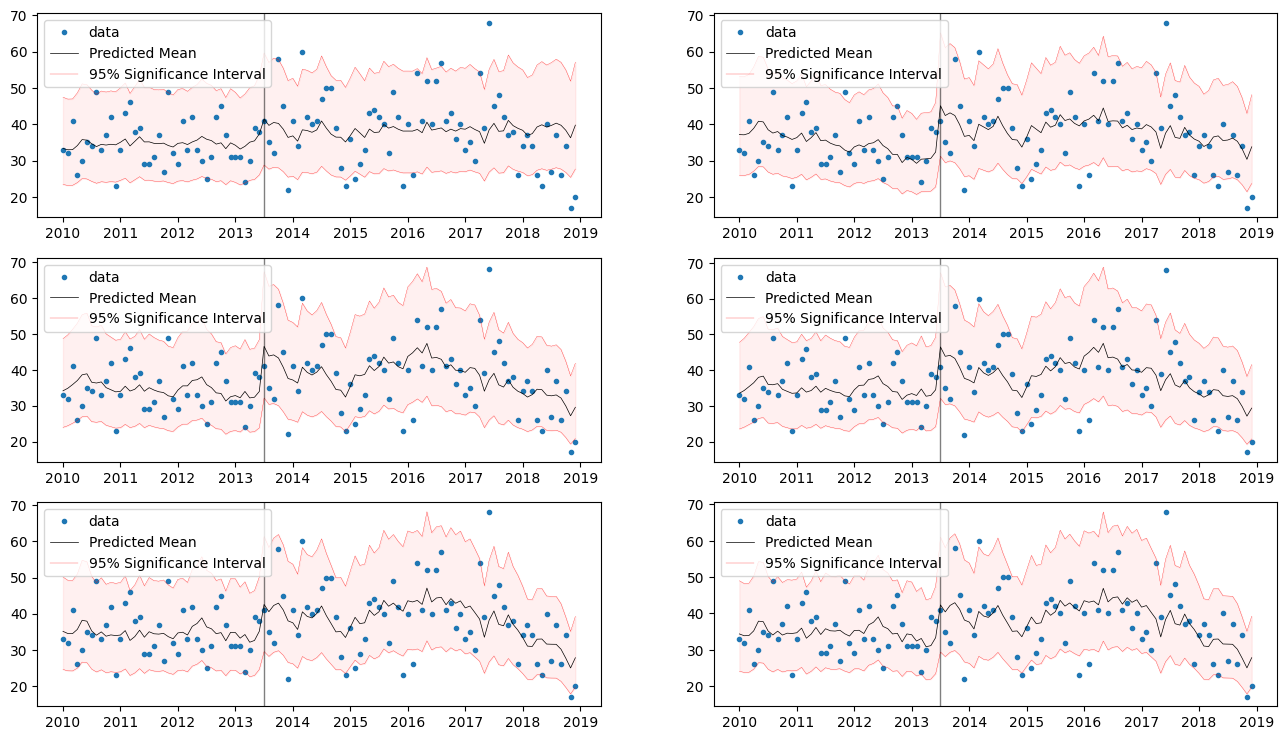

In [39]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5,results6]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.xticks(np.arange(0, len(mdf) +1 , step=len(mdf)/9), np.arange(2010,2020,1))  # Set label locations.
  #plt.savefig('reg_2.pdf')
  plt.legend(('data','Predicted Mean','95% Significance Interval'),loc='best')

plt.show()

In [40]:
from scipy import stats

In [41]:
# Get fitted values from each model
fitted_values1 = results1.fittedvalues
# ... repeat for other models ...

# Define the index of the policy intervention
policy_intervention_index = intervention

# Extract fitted values
last_fitted_value = fitted_values1.iloc[-1]  # replace 'fitted_values1' with the appropriate model's fitted values
pre_policy_fitted_value = fitted_values1.iloc[policy_intervention_index - 1]  # -1 because we want the value just before the intervention

# Statistical comparison
# Here we'll perform a z-test for comparing two Poisson rates
rate1 = pre_policy_fitted_value
rate2 = last_fitted_value
n1 = n2 = 1  # single observation for each rate

# Z-test formula for two Poisson rates
z = (rate1 - rate2) / ((rate1/n1 + rate2/n2)**0.5)
p_value = stats.norm.sf(abs(z)) * 2  # two-tailed p-value

print(f'Pre-policy fitted value: {rate1}, Last fitted value: {rate2}')
print(f'Z-statistic: {z}, P-value: {p_value}')

Pre-policy fitted value: 3.6194846323396894, Last fitted value: 3.6830185012171652
Z-statistic: -0.02351090931649073, P-value: 0.9812427365149454


In [42]:
import statsmodels.api as sm
import pandas as pd
from scipy import stats


results_list = []
# Loop through each model formula
for model in model_list:

    # Get fitted values
    fitted_values = model.fittedvalues

    # Extract fitted values
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[policy_intervention_index ]

    # Statistical comparison
    rate1 = pre_policy_fitted_value
    rate2 = last_fitted_value
    n1 = n2 = 1  # single observation for each rate

    # Z-test formula for two Poisson rates
    z = (rate1 - rate2) / ((rate1/n1 + rate2/n2)**0.5)
    p_value = stats.norm.sf(abs(z)) * 2  # two-tailed p-value

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store the results along with the fitted values and goodness-of-fit measures
    results_list.append((rate1, rate2, z, p_value, aic, bic, log_likelihood))

# Display the results
for i, (rate1, rate2, z, p, aic, bic, log_likelihood) in enumerate(results_list, start=1):
    print(f'Model {i}: Pre-policy fitted value = {rate1}, Last fitted value = {rate2}, Z-statistic = {z}, P-value = {p}, AIC = {aic}, BIC = {bic}, Log-Likelihood = {log_likelihood}')


Model 1: Pre-policy fitted value = 3.724369960924371, Last fitted value = 3.6830185012171652, Z-statistic = 0.015193515889850157, P-value = 0.9878777946365273, AIC = 824.1352427685915, BIC = 837.5458989042127, Log-Likelihood = -407.06762138429576
Model 2: Pre-policy fitted value = 3.8092236956768843, Last fitted value = 3.5205233147648194, Z-statistic = 0.1066357589777044, P-value = 0.9150779487539841, AIC = 805.3843064427554, BIC = 821.4770938055007, Log-Likelihood = -396.6921532213777
Model 3: Pre-policy fitted value = 3.8408102387276175, Last fitted value = 3.3872029020552326, Z-statistic = 0.16872156826822615, P-value = 0.866015652969898, AIC = 793.0974658428256, BIC = 809.1902532055709, Log-Likelihood = -390.5487329214128
Model 4: Pre-policy fitted value = 3.839460612645989, Last fitted value = 3.38083664740128, Z-statistic = 0.17067865269776597, P-value = 0.8644764491873164, AIC = 794.8559884266213, BIC = 813.6309070164908, Log-Likelihood = -390.4279942133106
Model 5: Pre-policy 

In [43]:
import numpy as np
import statsmodels.api as sm

# Assuming 'mdf' is your DataFrame and is already loaded

for model in model_list:

    # Get fitted values
    fitted_values = model.fittedvalues

    # Define the index of the policy intervention
    policy_intervention_index = intervention

    # Extract the pre-policy and last fitted values
    pre_policy_value = fitted_values.iloc[policy_intervention_index - 1]
    last_value = fitted_values.iloc[-1]

    # Bootstrapping
    n_bootstraps = 100000  # Number of bootstrap samples
    bootstrap_differences = []

    for _ in range(n_bootstraps):
        # Bootstrap sample
        sample = fitted_values.sample(frac=1, replace=True)

        # Compute the difference
        pre_policy_sample_value = sample.iloc[policy_intervention_index - 1]
        last_sample_value = sample.iloc[-1]
        difference = last_sample_value - pre_policy_sample_value

        bootstrap_differences.append(difference)

    # Compute the proportion of differences that are 0 or more (one-tailed test)
    p_value = np.mean(np.array(bootstrap_differences) >= 0)

    print(f'Mean bootstrapped difference: {np.mean(bootstrap_differences)}')
    print(f'P-value: {p_value}')


Mean bootstrapped difference: 0.00028122555062068817
P-value: 0.50598
Mean bootstrapped difference: 0.0005200953249492906
P-value: 0.50559
Mean bootstrapped difference: 6.535621664140225e-05
P-value: 0.50449
Mean bootstrapped difference: 0.00023184611510134516
P-value: 0.50627
Mean bootstrapped difference: -0.00016410731258804947
P-value: 0.50293
Mean bootstrapped difference: -0.0003982318664784864
P-value: 0.50311


In [44]:
#  Corruption
results1 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results3 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
results4 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t2','s2','gdp','unemployment','real_interest']]).fit()
results5 = sm.NegativeBinomial(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','gdp','unemployment','real_interest']]).fit()
stargazer = Stargazer([results1, results2,results3,results4,results5])
stargazer.covariate_order(['cons','dummy','t2','s2','unemployment','real_interest','gdp'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 3.584325
         Iterations: 32
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 3.504898
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41
         Current function value: 3.504176
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 46
         Current function value: 4.645436
         Iterations: 0
         Function evaluations: 13
         Gradient evaluations: 2
         Current function value: 4.645428
         Iterations: 0
         Function evaluations: 13
         Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3379: RuntimeWarning: divide by zero encountered in log
 

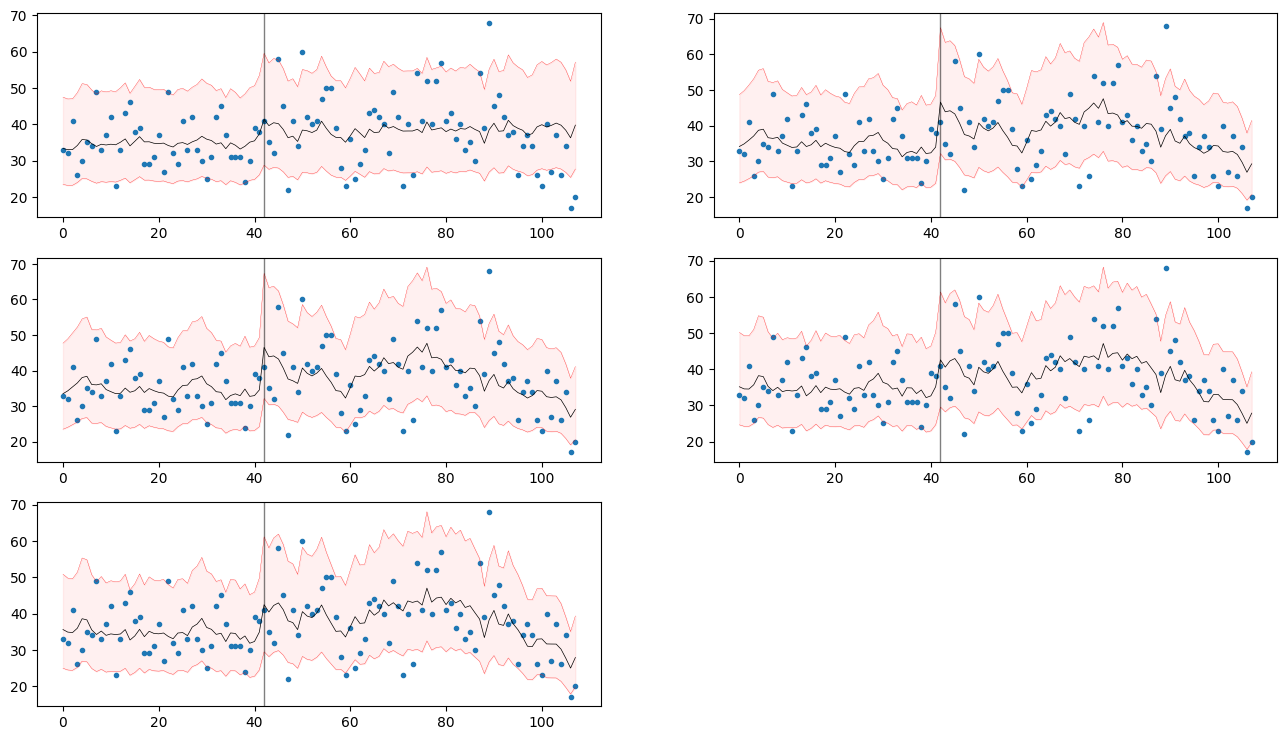

In [45]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4,results5]
theta = intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( mdf['t1'], mdf['offences'], '.',lw=1)
  plt.plot(mdf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  plt.plot(mdf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( mdf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( mdf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  #plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

### Robustness --> Regressing with Lagged Variables

In [46]:
#
results1 = sm.OLS(mdf['offences'], mdf[['cons','dummy','l_gdp','l_unemployment','l_real_interest']]).fit()
results2 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','l_gdp','l_unemployment','l_real_interest']]).fit()
results3 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','s1','c1','t2','s2','c2','l_gdp','l_unemployment','l_real_interest']]).fit()
results4 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t2','s2','c2','l_gdp','l_unemployment','l_real_interest']]).fit()
results5 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','q2','l_gdp','l_unemployment','l_real_interest']]).fit()
results6 = sm.OLS(mdf['offences'], mdf[['cons','dummy','t1','t2','s2','f2','l_gdp','l_unemployment','l_real_interest']]).fit()
model_list = [results1, results2,results3,results4,results5,results6]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','l_unemployment','l_real_interest','l_gdp'])
HTML(stargazer.render_html())

In [47]:

# Assuming 'model_list' and 'intervention' are defined
results_list = []

for model in model_list:
    # Get fitted values
    fitted_values = model.fittedvalues

    # Get standard errors of the fitted values
    predictions = model.get_prediction()
    predict_std_err = predictions.se_mean

    # Extract fitted values and their standard errors
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]
    last_se = predict_std_err[-1]
    pre_policy_se = predict_std_err[intervention - 1]

    # Calculate the standard error of the difference
    diff_se = np.sqrt(last_se**2 + pre_policy_se**2)

    # Calculate the observed difference
    observed_diff = last_fitted_value - pre_policy_fitted_value

    # t-test for the difference
    t_stat = observed_diff / diff_se
    df = len(fitted_values) - len(model.params)  # degrees of freedom
    p_value = 2 * stats.t.sf(np.abs(t_stat), df)

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store results
    results_list.append([pre_policy_fitted_value, last_fitted_value, observed_diff, p_value, aic, bic, log_likelihood])

# Create DataFrame
results_df = pd.DataFrame(results_list, columns=['Pre-policy Value', 'Last Value', 'Difference', 'P-value', 'AIC', 'BIC', 'Log-Likelihood'])

# Add Model numbers
results_df.index = [f'Model {i+1}' for i in range(len(results_df))]

# Display the DataFrame
print(results_df)


         Pre-policy Value  Last Value  Difference   P-value         AIC  \
Model 1         35.070658   38.641488    3.570829  0.311597  790.883859   
Model 2         34.051989   28.279005   -5.772984  0.193777  777.173168   
Model 3         36.190674   22.689055  -13.501620  0.043766  778.848465   
Model 4         36.376546   22.215414  -14.161132  0.006987  773.629867   
Model 5         36.003516   20.917034  -15.086482  0.006869  774.689722   
Model 6         35.938872   20.179245  -15.759627  0.005961  774.394890   

                BIC  Log-Likelihood  
Model 1  804.294515     -390.441929  
Model 2  795.948087     -381.586584  
Model 3  808.351908     -378.424232  
Model 4  795.086917     -378.814933  
Model 5  798.828903     -378.344861  
Model 6  798.534071     -378.197445  


In [48]:
#
results1 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','l_gdp','l_unemployment','l_real_interest']]).fit()
results2 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','l_gdp','l_unemployment','l_real_interest']]).fit()
results3 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','l_gdp','l_unemployment','l_real_interest']]).fit()
results4 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','t2','l_gdp','l_unemployment','l_real_interest']]).fit()
results5 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t2','s2','l_gdp','l_unemployment','l_real_interest']]).fit()
results6 = sm.Poisson(mdf['offences'], mdf[['cons','dummy','t1','s1','t2','s2','l_gdp','l_unemployment','l_real_interest']]).fit()
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','l_unemployment','l_real_interest','l_gdp'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 3.789171
         Iterations 4
Optimization terminated successfully.
         Current function value: 3.696350
         Iterations 5
Optimization terminated successfully.
         Current function value: 3.628796
         Iterations 5
Optimization terminated successfully.
         Current function value: 3.626930
         Iterations 5
Optimization terminated successfully.
         Current function value: 3.599048
         Iterations 9
Optimization terminated successfully.
         Current function value: 3.596157
         Iterations 20


## LOWESS - Localy weighted scatterplot smoothing

We fit a curve to the univariate corruption detection data.

In [49]:
import pylab
import seaborn as sns


pylab.rc("figure", figsize=(16, 8))
pylab.rc("font", size=14)



In [50]:
smoothed = sm.nonparametric.lowess(exog=mdf['t1'], endog= mdf['offences'], frac=0.2)

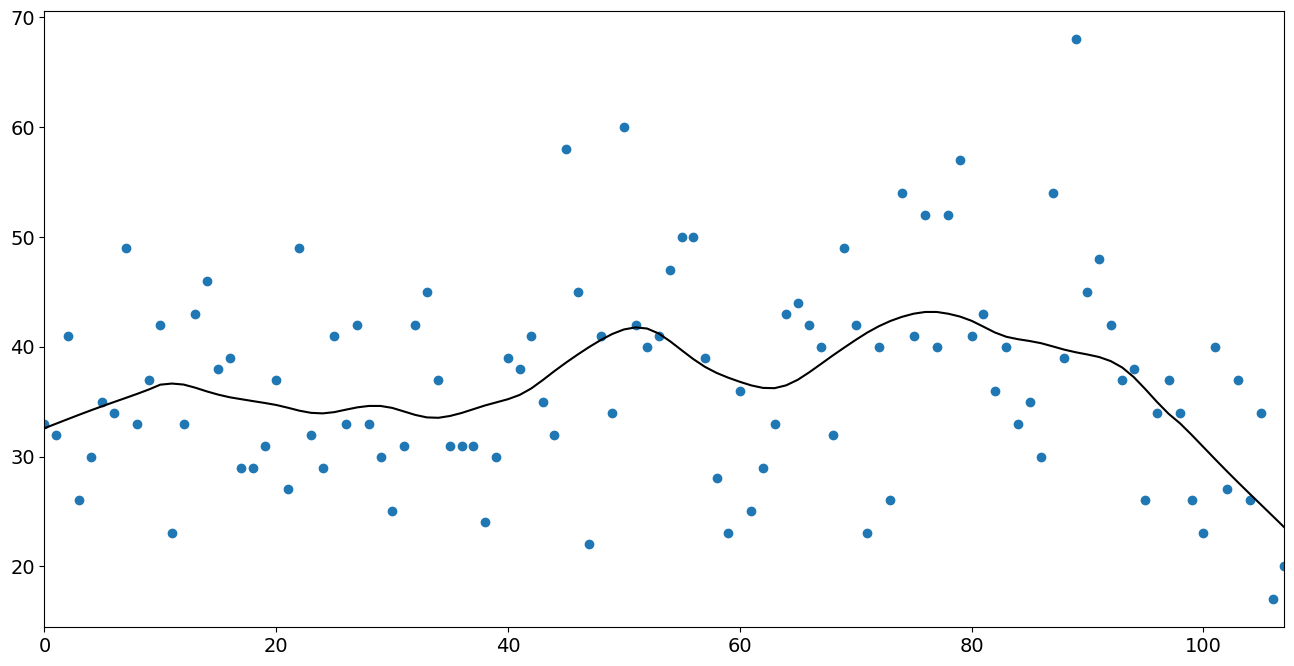

In [51]:
# Plot the fit line
fig, ax = pylab.subplots()

ax.scatter(mdf['t1'], mdf['offences'])
ax.plot(smoothed[:, 0], smoothed[:, 1], c="k")
pylab.autoscale(enable=True, axis="x", tight=True)

In [52]:
# Now create a bootstrap confidence interval around the a LOWESS fit


def lowess_with_confidence_bounds(
    x, y, eval_x, N=200, conf_interval=0.95, lowess_kw=None
):
    """
    Perform Lowess regression and determine a confidence interval by bootstrap resampling
    """
    # Lowess smoothing
    smoothed = sm.nonparametric.lowess(exog=x, endog=y, xvals=eval_x, **lowess_kw)

    # Perform bootstrap resamplings of the data
    # and  evaluate the smoothing at a fixed set of points
    smoothed_values = np.empty((N, len(eval_x)))
    for i in range(N):
        sample = np.random.choice(len(x), len(x), replace=True)
        sampled_x = x[sample]
        sampled_y = y[sample]

        smoothed_values[i] = sm.nonparametric.lowess(
            exog=sampled_x, endog=sampled_y, xvals=eval_x, **lowess_kw
        )

    # Get the confidence interval
    sorted_values = np.sort(smoothed_values, axis=0)
    bound = int(N * (1 - conf_interval) / 2)
    bottom = sorted_values[bound - 1]
    top = sorted_values[-bound]

    return smoothed, bottom, top




In [53]:
# Compute the 95% confidence interval
eval_x = np.linspace(0, 107, 31)
smoothed, bottom, top = lowess_with_confidence_bounds(
    mdf['t1'], mdf['offences'], eval_x, lowess_kw={"frac": 0.25}
)

<ipython-input-52-f5ff680cd96c>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sampled_x = x[sample]
<ipython-input-52-f5ff680cd96c>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sampled_y = y[sample]


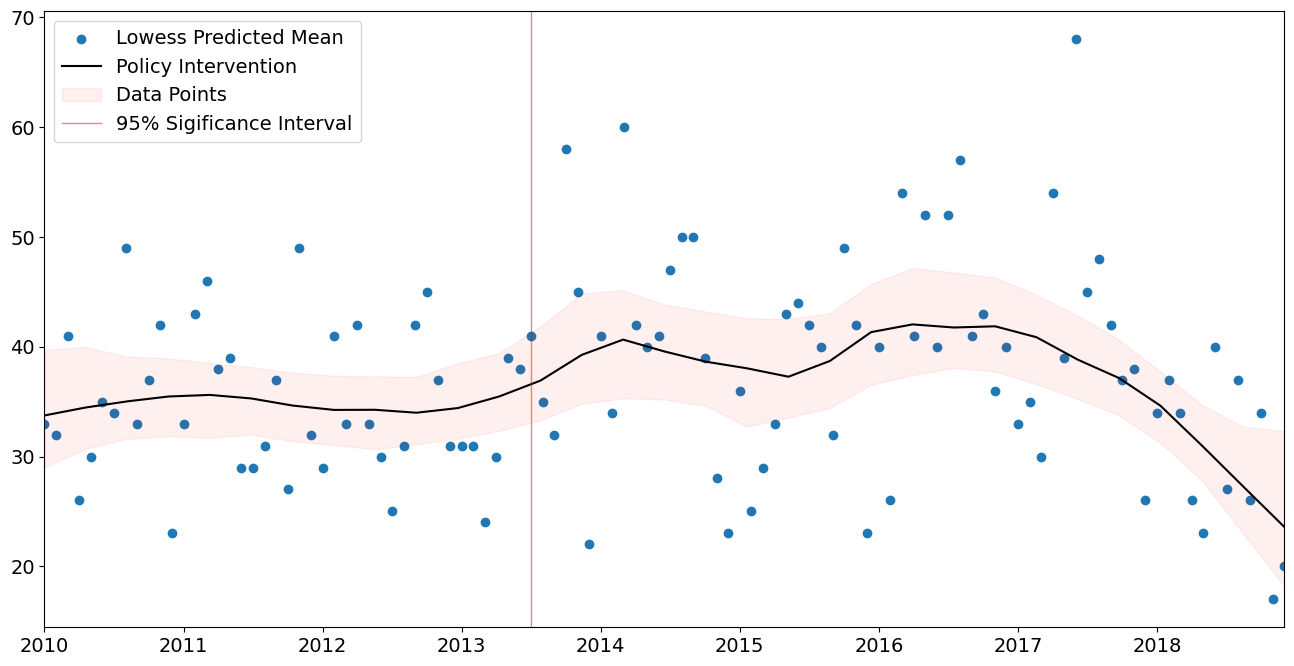

In [54]:
# Plot the confidence interval and fit
fig, ax = pylab.subplots()
ax.scatter(mdf['t1'], mdf['offences'])
ax.plot(eval_x, smoothed, c="k")
ax.fill_between(eval_x, bottom, top, alpha=0.06, color="r")
ax.axvline(theta, color='red', lw=1, alpha=0.5)
plt.xticks(np.arange(0, len(mdf) +1 , step=len(mdf)/9), np.arange(2010,2020,1))  # Set label locations.
plt.legend(('Lowess Predicted Mean','Policy Intervention','Data Points','95% Sigificance Interval'),loc=2)
pylab.autoscale(enable=True, axis="x", tight=True)
#plt.savefig('lowess.pdf')

In [55]:
# predictions
smoothed

array([33.74161096, 34.46699979, 35.0222235 , 35.4667589 , 35.61198674,
       35.29081795, 34.64522045, 34.24685881, 34.25711556, 33.98970698,
       34.41339042, 35.4678435 , 36.91630136, 39.26000215, 40.64885362,
       39.56774057, 38.63916815, 38.03233794, 37.26939289, 38.69956884,
       41.32935819, 42.03400177, 41.75170708, 41.85972082, 40.8666987 ,
       38.82173014, 37.14308387, 34.62654776, 31.00880199, 27.27812396,
       23.5728688 ])

In [56]:
# Calculating the percntage variation from the end of the data in relation to the pre-policy period

mpv = np.array([33.74161096, 34.46699979, 35.0222235 , 35.4667589 , 35.61198674,
       35.29081795, 34.64522045, 34.24685881, 34.25711556, 33.98970698,
       34.41339042, 35.4678435]).mean()

(mpv - 23.57)/mpv

0.32110883353936626

In [57]:
# The botton value of the imediete pre-policy shock
bottom[11]

32.34588001358119

In [58]:
# Upper bound of the last period
top[-1]

32.30212275815754

## Daily Data and Regressions

In [59]:
## Daily data

ddf = df_corruption['2011':'2019'].resample('D').count()

#create a constant

ddf['cons'] = 1


# creat a dummy with 0 before feb 2014 (x days) and 1 after # Change this to better fit###
d_intervention = 504

dummy = []
for i in (range(0,len(ddf))):
    if i <intervention:
        dummy.append(0)
    else:
        dummy.append(1)

ddf['dummy'] = dummy

# creat a list of 1 to 13#
t1 = list(range(0,len(ddf)))

ddf['t1'] = t1

# creat a polynom root after 2013#
t2= []
for i in (range(0,len(ddf))):
    if i < intervention:
        t2.append(0)
    else:
        t2.append(i-intervention)

ddf['t2'] = t2

#Creating other orther polynomials

ddf['s1'] = np.power(t1,2)
ddf['c1'] = np.power(t1,3)
ddf['s2'] = np.power(t2,2)
ddf['c2'] = np.power(t2,3)
ddf['q1'] = np.power(t1,4)
ddf['f1'] = np.power(t1,5)
ddf['q2'] = np.power(t2,4)
ddf['f2'] = np.power(t2,5)



In [60]:
# Creating the Daily data for the other exogenous variables



ddf['gdp'] = tgdp['2008-12-01':'2019'].resample('D', closed = 'left').bfill()

ddf['gdp'] = ddf['gdp'].fillna( 'bfill')

ddf['unemployment'] = unemployment['2009':'2020'].resample('D').sum()

ddf['unemployment'] = ddf['unemployment'].fillna( 'bfill')

ddf['inflation'] = inflation['2008-12-01':'2019'].resample('D').sum()

ddf['inflation'] = ddf['inflation'].fillna( 'bfill')

ddf['interest'] = interest['2009':'2020'].resample('D').sum()

ddf['interest'] = ddf['interest'].fillna( 'bfill')

ddf['real_interest'] = ddf['inflation']*(ddf['interest']+1)


In [61]:
#  Corruption
results1 = sm.OLS(ddf['offences'], ddf[['cons','dummy']]).fit()
results2 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2']]).fit()
results3 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t1','t2']]).fit()
results4 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2']]).fit()
results5 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2']]).fit()
results6 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','f2']]).fit()
results7 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','gdp','unemployment','real_interest']]).fit()
results8 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','gdp','unemployment','real_interest']]).fit()
results9 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','gdp','unemployment','real_interest']]).fit()
results10 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','f2','gdp','unemployment','real_interest']]).fit()
results11 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','gdp','unemployment','real_interest']]).fit()
results12 = sm.OLS(ddf['offences'], ddf[['cons','dummy','t2','s2','c2','q2','f2','gdp','unemployment','real_interest']]).fit()
model_list = [results1, results2,results3,results4,results5,results6,results7, results8,results9,results10,results11,results12]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','t1','t2','s2','c2','q2','f2','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

In [62]:

# Assuming 'model_list' and 'intervention' are defined
results_list = []

for model in model_list:
    # Get fitted values
    fitted_values = model.fittedvalues

    # Get standard errors of the fitted values
    predictions = model.get_prediction()
    predict_std_err = predictions.se_mean

    # Extract fitted values and their standard errors
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]
    last_se = predict_std_err[-1]
    pre_policy_se = predict_std_err[intervention - 1]

    # Calculate the standard error of the difference
    diff_se = np.sqrt(last_se**2 + pre_policy_se**2)

    # Calculate the observed difference
    observed_diff = last_fitted_value - pre_policy_fitted_value

    # t-test for the difference
    t_stat = observed_diff / diff_se
    df = len(fitted_values) - len(model.params)  # degrees of freedom
    p_value = 2 * stats.t.sf(np.abs(t_stat), df)

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store results
    results_list.append([pre_policy_fitted_value, last_fitted_value, observed_diff, p_value, aic, bic, log_likelihood])

# Create DataFrame
results_df = pd.DataFrame(results_list, columns=['Pre-policy Value', 'Last Value', 'Difference', 'P-value', 'AIC', 'BIC', 'Log-Likelihood'])

# Add Model numbers
results_df.index = [f'Model {i+1}' for i in range(len(results_df))]

# Display the DataFrame
print(results_df)


          Pre-policy Value  Last Value  Difference   P-value           AIC  \
Model 1       1.023810e+00    1.220302    0.196493  0.412463  12169.180469   
Model 2       1.023810e+00    1.241049    0.217240  0.373954  12170.985067   
Model 3       3.809524e-01    1.241049    0.860097  0.067960  12170.435719   
Model 4       1.023810e+00    1.084022    0.060213  0.810788  12166.253371   
Model 5       1.024472e+00    0.709003   -0.315469  0.246475  12156.079292   
Model 6       2.327659e-11    0.277169    0.277169  0.078957  12369.636544   
Model 7       1.031640e+00    1.068006    0.036366  0.885682  12166.954910   
Model 8       1.031255e+00    0.806628   -0.224627  0.393069  12156.322209   
Model 9       1.031289e+00    0.723658   -0.307631  0.258170  12153.763565   
Model 10      2.332962e-11    0.277169    0.277169  0.078957  12369.636544   
Model 11      1.031289e+00    0.723658   -0.307631  0.258170  12153.763565   
Model 12      2.332962e-11    0.277169    0.277169  0.078957  12

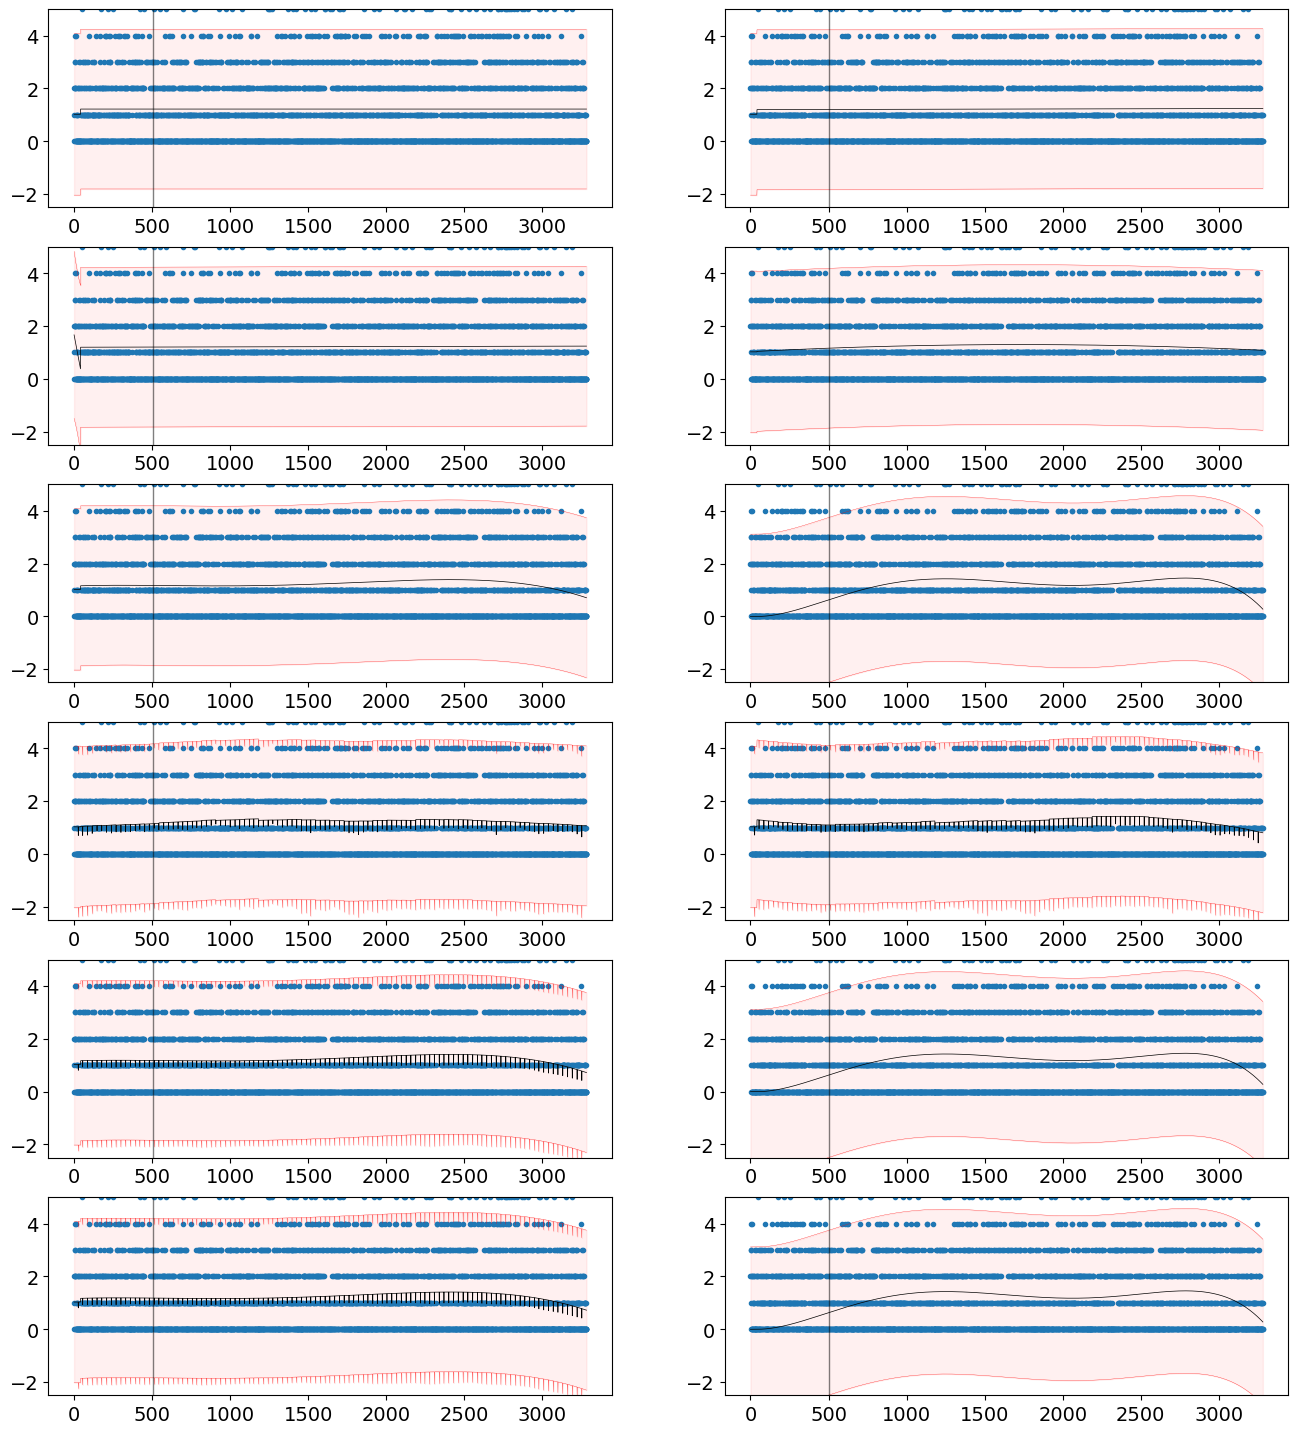

In [63]:

fig = plt.figure(figsize=(16,18))

result_list = [results1, results2,results3,results4,results5,results6,results7, results8,results9,results10,results11,results12]
theta = d_intervention

for i in range(len(result_list)):
  plt.subplot(6,2,i+1)
  iv_l1 = result_list[i].get_prediction().summary_frame()["obs_ci_lower"]
  iv_u1 = result_list[i].get_prediction().summary_frame()["obs_ci_upper"]
  plt.plot( ddf['t1'], ddf['offences'], '.',lw=.01)
  plt.plot(ddf['t1'],result_list[i].fittedvalues, 'k-', lw=0.5)
  plt.plot(ddf['t1'], iv_u1, color='red', lw=0.2)
  plt.plot( ddf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.fill_between( ddf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  plt.ylim((-2.5, 5))
  #plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

In [64]:
#  Corruption
results1 = sm.Poisson(ddf['offences'], ddf[['cons','dummy']]).fit()
results2 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t2']]).fit()
results3 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t1','t2']]).fit()
results4 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results5 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results6 = sm.Poisson(ddf['offences'], ddf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
stargazer = Stargazer([results1, results2,results3,results4, results5,results6])
stargazer.covariate_order(['cons','dummy','t1','t2','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

Optimization terminated successfully.
         Current function value: 1.649331
         Iterations 4
Optimization terminated successfully.
         Current function value: 1.649273
         Iterations 8
Optimization terminated successfully.
         Current function value: 1.648358
         Iterations 11
Optimization terminated successfully.
         Current function value: 1.647681
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.647674
         Iterations 9
Optimization terminated successfully.
         Current function value: 1.646778
         Iterations 11


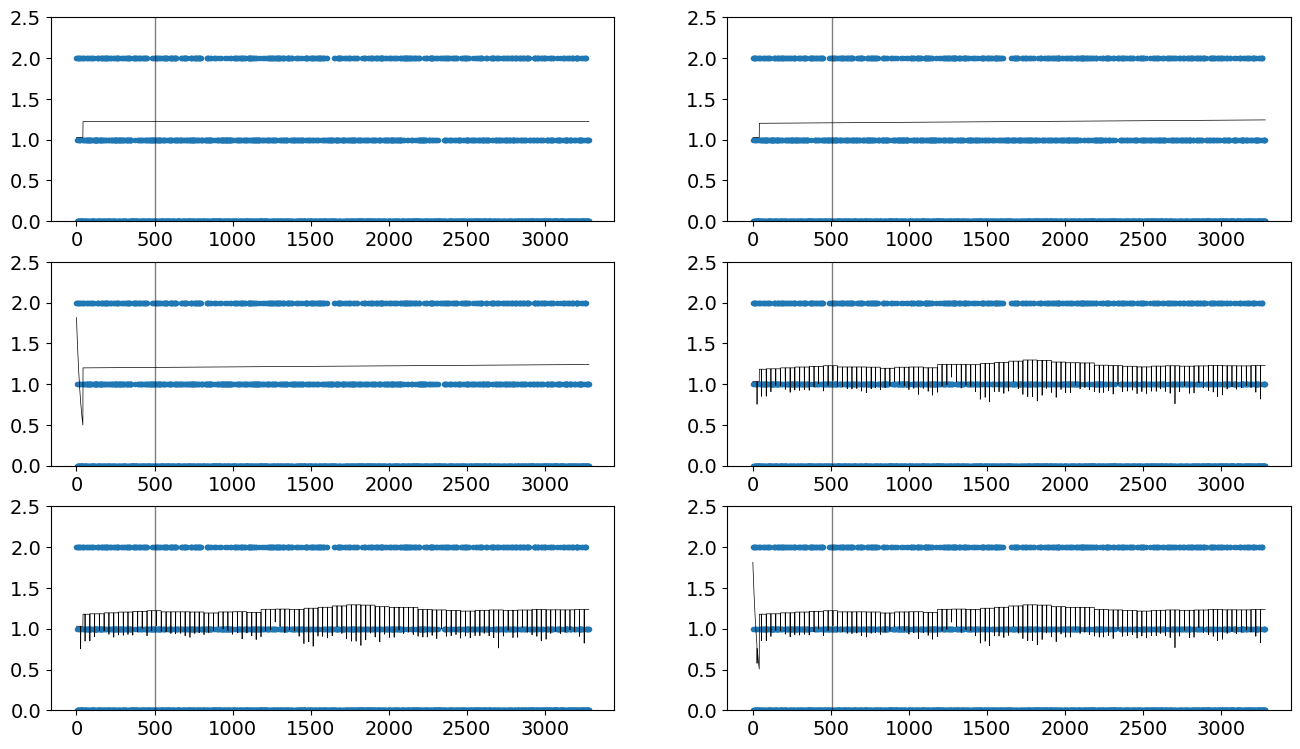

In [65]:

fig = plt.figure(figsize=(16,9))

result_list = [results1, results2,results3,results4, results5,results6]
theta = d_intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  #iv_l1 = np.exp(result_list[i].fittedvalues.values - 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  #iv_u1 = np.exp(result_list[i].fittedvalues.values + 1.96*((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))**(1/2)))
  plt.plot( ddf['t1'], ddf['offences'], '.',lw=.000001)
  plt.plot (ddf['t1'],np.exp(result_list[i].fittedvalues), 'k-', lw=0.5)
  #plt.plot(ddf['t1'], iv_u1, color='red', lw=0.2)
  #plt.plot( ddf['t1'],iv_l1, color='red', lw=0.2)
  plt.axvline(theta, color='black', lw=1, alpha=0.5)
  plt.ylim((0, 2.5))
  #plt.fill_between( ddf['t1'],iv_u1,iv_l1, color='red', alpha=0.06)
  #plt.legend(('data','OLS','95% Significance'),loc=2)

plt.show()

In [66]:
np.exp(result_list[i].fittedvalues.values + 1.96*np.sqrt((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))))

<ipython-input-66-dfa32833a086>:1: RuntimeWarning: invalid value encountered in sqrt
  np.exp(result_list[i].fittedvalues.values + 1.96*np.sqrt((result_list[i].fittedvalues.values/len(result_list[i].fittedvalues.values))))


array([1.86376671, 1.80539304, 1.74881352, ..., 1.25551725, 1.25552225,
       1.25552725])

In [67]:
#  Corruption
results1 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy']]).fit()
results2 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t2']]).fit()
results3 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t1','t2']]).fit()
results1 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t2','gdp','unemployment','real_interest']]).fit()
results3 = sm.NegativeBinomial(ddf['offences'], ddf[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()

stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['cons','dummy','t2','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3663: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3379: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3470: RuntimeWarning: overflow encountered in multiply
  dparams = exog*a1 * (y-mu)/(mu+a1)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3470: RuntimeWarning: invalid value encountered in divide
  dparams = exog*a1 * (y-mu)/(mu+a1)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3473: RuntimeWarning: invalid value encountered in divide
  - np.log(a1+mu) - (y-mu)/(a1+mu)).sum() * da1
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Desired error not necessarily ach

Optimization terminated successfully.
         Current function value: 1.525366
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 1.525336
         Iterations: 23
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 1.573903
         Iterations: 0
         Function evaluations: 13
         Gradient evaluations: 2
Optimization terminated successfully.
         Current function value: 1.524505
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3379: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3379: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:3379: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.

         Current function value: 1.524502
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 49
         Current function value: 1.524049
         Iterations: 35
         Function evaluations: 52
         Gradient evaluations: 52


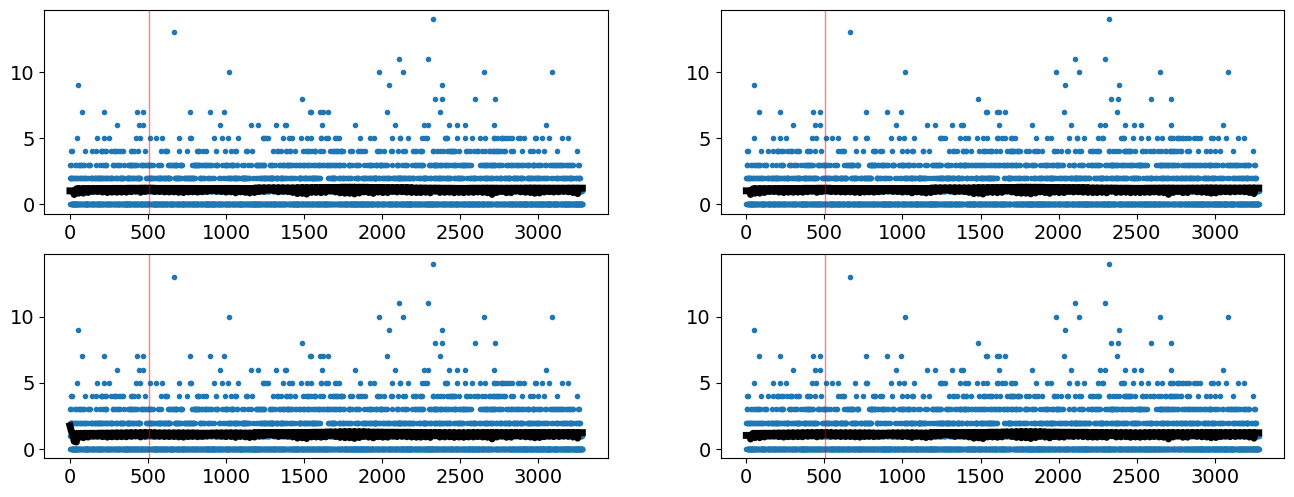

In [68]:

fig = plt.figure(figsize=(16,9))

result_list = [results1,results2,results3,results4]
theta = d_intervention

for i in range(len(result_list)):
  plt.subplot(3,2,i+1)
  plt.plot( ddf['t1'], ddf['offences'], '.',lw=1)
  ax.set_ylim([0,2])
  plt.plot(ddf['t1'],np.exp(result_list[i].fittedvalues), 'k', lw=5)
  plt.axvline(theta, color='red', lw=1, alpha=0.5)
 # plt.legend(('data','OLS'),loc=2)

plt.show()

## Daily Lowess

In [69]:
smoothed = sm.nonparametric.lowess(exog=ddf['t1'], endog= ddf['offences'], frac=0.2)

In [70]:
# Compute the 95% confidence interval
eval_x = np.linspace(0, len(ddf), 31)
smoothed, bottom, top = lowess_with_confidence_bounds(
    ddf['t1'], ddf['offences'], eval_x, lowess_kw={"frac": 0.3})

<ipython-input-52-f5ff680cd96c>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sampled_x = x[sample]
<ipython-input-52-f5ff680cd96c>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sampled_y = y[sample]


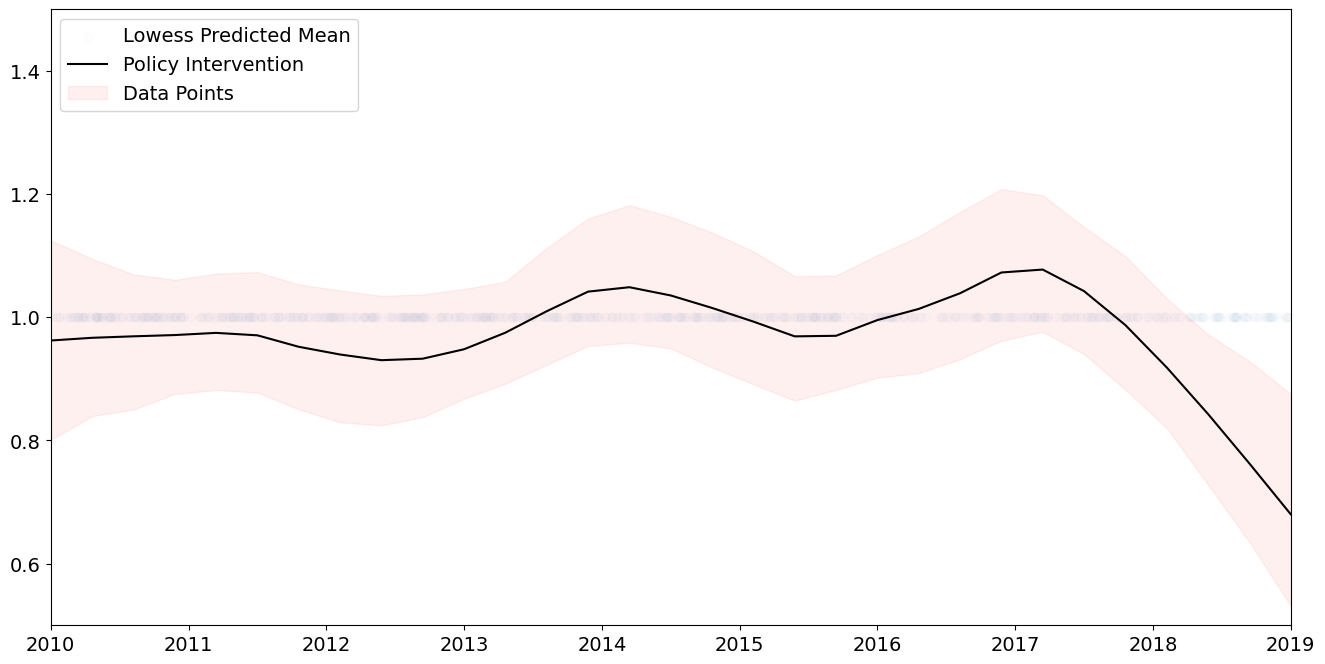

In [71]:
# Plot the confidence interval and fit
fig, ax = pylab.subplots()
ax.scatter(ddf['t1'], ddf['offences'],alpha=0.01)
ax.plot(eval_x, smoothed, c="k")
ax.set_ylim([0.5,1.5])
ax.fill_between(eval_x, bottom, top, alpha=0.06, color="r")
plt.xticks(np.arange(0, len(ddf) +1 , step=len(ddf)/9), np.arange(2010,2020,1))  # Set label locations.
pylab.autoscale(enable=True, axis="x", tight=True)
#ax.axvline(len(ddf)*0.3888, color='red', lw=1, alpha=1.5)
plt.legend(('Lowess Predicted Mean','Policy Intervention','Data Points','95% Sigificance Interval'),loc=2)
#plt.savefig('daily_lowess.pdf')

## Trying a higher dimensional LOESS


In [72]:
!pip install loess

In [73]:
!pip install --upgrade loess

In [74]:
# from loess.loess_2d import loess_2d

In [75]:
# zout, wout = loess_2d(mdf['t1'], mdf['unemployment'], mdf['offences'], xnew=None, ynew=None, degree=1, frac=0.5, npoints=None, rescale=True, sigz=None)

In [76]:
# zout

In [77]:
# wout

In [78]:
# # Plot the confidence interval and fit
# fig, ax = pylab.subplots()
# ax.scatter(mdf['t1'], mdf['offences'])
# ax.plot(mdf['t1'], zout, c="k")
# ax.axvline(len(mdf)*0.38, color='red', lw=1, alpha=1.5)
# plt.xticks(np.arange(0, len(mdf) +1 , step=len(mdf)/9), np.arange(2010,2020,1))  # Set label locations.
# plt.legend(('Lowess Predicted Mean','Policy Intervention','Data Points','95% Sigificance Interval'),loc=2)
# pylab.autoscale(enable=True, axis="x", tight=True)

In [79]:
#Budgets Without Social Securuty Expenses
#Budget data from MPU 34000
mpu = [3145908775 ,3368718102, 3451162684,  3653232583, 4380220919, 5317241943, 4960053426, 5875777130, 5909003368, 6179905334,  6115794933]

#Budjet from MPF 34101

mpf = [2016295199 , 2096197287, 2116210654, 2274057081, 2726137936, 3403084147, 2949960222, 3460598218, 3428593780, 3632701538, 3553116339]

#Budget from number '30108' Polia Federal until 2018 then '82102'
pf = [2818901513 , 2893626928, 2921476071, 3415940083, 3521673884, 3865547950, 4018090731, 4486847532, 5224549182, 5385975529, 3337023173 ]

In [80]:
#2010 link https://www.gov.br/planejamento/pt-br/assuntos/orcamento/orcamentos-anuais
#2013 Was taken from the Project and not from the law itself, because it was not available

In [81]:
ygdp = tgdp['2009-12-01':'2020'].resample('YE', closed = 'left').bfill()['gdp']

In [82]:
ygdp.reset_index()

,date,gdp
0,2009-12-31,0.053243
1,2010-12-31,0.056893
2,2011-12-31,0.025680
3,2012-12-31,0.024829
4,2013-12-31,0.025281
5,2014-12-31,-0.002257
6,2015-12-31,-0.055308
7,2016-12-31,-0.022144
8,2017-12-31,0.023817
9,2018-12-31,0.012229


In [83]:
import pandas as pd

# Budget data
mpu = [3145908775, 3368718102, 3451162684, 3653232583, 4380220919, 5317241943, 4960053426, 5875777130, 5909003368, 6179905334, 6115794933]
mpf = [2016295199, 2096197287, 2116210654, 2274057081, 2726137936, 3403084147, 2949960222, 3460598218, 3428593780, 3632701538, 3553116339]
pf = [2818901513, 2893626928, 2921476071, 3415940083, 3521673884, 3865547950, 4018090731, 4486847532, 5224549182, 5385975529, 3337023173]
ygdp = [3885847, 4376382, 4814760, 5331619, 5778953, 6269328, 6585479,7004141, 7389131, 7609597, 9012142]

# Create DataFrame for budgets
years = pd.date_range(start="2010", end="2021", freq="Y")
df_budget = pd.DataFrame({
    "date": years,
    "mpu": mpu,
    "mpf": mpf,
    "pf": pf,
    'ygdp':ygdp
})
df_budget.set_index("date", inplace=True)

# Calculate percentual variations
df_budget["v_mpu"] = df_budget["mpu"].pct_change().fillna(0)
df_budget["v_mpf"] = df_budget["mpf"].pct_change().fillna(0)
df_budget["v_pf"] = df_budget["pf"].pct_change().fillna(0)
df_budget["v_ygdp"] = df_budget["ygdp"].pct_change().fillna(0)





<ipython-input-83-26df006ea9ca>:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range(start="2010", end="2021", freq="Y")


In [102]:
df_budget[:'2019']

,mpu,mpf,pf,ygdp,v_mpu,v_mpf,v_pf,v_ygdp
date,,,,,,,,
2010-12-31,3145908775,2016295199,2818901513,3885847,0.000000,0.000000,0.000000,0.000000
2011-12-31,3368718102,2096197287,2893626928,4376382,0.070825,0.039628,0.026509,0.126236
2012-12-31,3451162684,2116210654,2921476071,4814760,0.024474,0.009547,0.009624,0.100169
2013-12-31,3653232583,2274057081,3415940083,5331619,0.058551,0.074589,0.169251,0.107349
2014-12-31,4380220919,2726137936,3521673884,5778953,0.198999,0.198799,0.030953,0.083902
2015-12-31,5317241943,3403084147,3865547950,6269328,0.213921,0.248317,0.097645,0.084855
2016-12-31,4960053426,2949960222,4018090731,6585479,-0.067176,-0.133151,0.039462,0.050428
2017-12-31,5875777130,3460598218,4486847532,7004141,0.184620,0.173100,0.116662,0.063574
2018-12-31,5909003368,3428593780,5224549182,7389131,0.005655,-0.009248,0.164414,0.054966


In [108]:
# Extract only the variation columns (v_ variables)
variation_columns = ["mpu", "mpf", "pf", "ygdp"]
correlation_matrix = df_budget[:'2019'][variation_columns].corr()

In [109]:
correlation_matrix

,mpu,mpf,pf,ygdp
mpu,1.000000,0.991621,0.949261,0.972563
mpf,0.991621,1.000000,0.914859,0.950706
pf,0.949261,0.914859,1.000000,0.957897
ygdp,0.972563,0.950706,0.957897,1.000000


In [87]:
# Resample the dataset to monthly frequency, interpolating the values to fill gaps
df_budget_monthly = df_budget.resample('M').interpolate(method='linear')


# Merge `df_budget_monthly` with `mdf`
merged_df = df_budget_monthly.merge(mdf, how="left", left_index=True, right_index=True)

merged_df = merged_df['2011':'2019']

<ipython-input-87-19e16ec6aa8b>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_budget_monthly = df_budget.resample('M').interpolate(method='linear')


In [88]:
#regressing


results1 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','gdp','unemployment','real_interest']]).fit()
results3 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','s1','c1','t2','s2','c2','gdp','unemployment','real_interest']]).fit()
results4 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t2','s2','c2','gdp','unemployment','real_interest']]).fit()
results5 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','s2','q2','gdp','unemployment','real_interest']]).fit()
results6 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','s2','f2','gdp','unemployment','real_interest']]).fit()
model_list = [results1, results2,results3,results4,results5,results6]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','gdp','unemployment','real_interest'])
HTML(stargazer.render_html())

In [89]:
from scipy import stats

results_list = []

# Assuming you have a list of OLS models in model_list
for model in model_list:

    # Get fitted values
    fitted_values = model.fittedvalues

    # Extract fitted values
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]

    # Difference between pre-policy and last fitted values (not a Z-test)
    difference = last_fitted_value - pre_policy_fitted_value

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store the results along with the fitted values and goodness-of-fit measures
    results_list.append((pre_policy_fitted_value, last_fitted_value, difference, aic, bic, log_likelihood))

# Display the results
for i, (pre_policy_value, last_value, difference, aic, bic, log_likelihood) in enumerate(results_list, start=1):
    print(f'Model {i}: Pre-policy fitted value = {pre_policy_value}, Last fitted value = {last_value}, Difference = {difference}, AIC = {aic}, BIC = {bic}, Log-Likelihood = {log_likelihood}')

Model 1: Pre-policy fitted value = 37.38765058899237, Last fitted value = 39.74032288055173, Difference = 2.352672291559358, AIC = 788.8677228796058, BIC = 802.278379015227, Log-Likelihood = -389.4338614398029
Model 2: Pre-policy fitted value = 34.59680621737989, Last fitted value = 28.804235457681497, Difference = -5.792570759698396, AIC = 775.8652389644428, BIC = 794.6401575543124, Log-Likelihood = -380.9326194822214
Model 3: Pre-policy fitted value = 36.12984693530574, Last fitted value = 23.66256425606778, Difference = -12.467282679237965, AIC = 778.5925910503998, BIC = 808.0960345487663, Log-Likelihood = -378.2962955251999
Model 4: Pre-policy fitted value = 36.319623614332045, Last fitted value = 23.255032229724932, Difference = -13.064591384607112, AIC = 773.3310782206929, BIC = 794.7881280376866, Log-Likelihood = -378.66553911034646
Model 5: Pre-policy fitted value = 35.94668355523395, Last fitted value = 22.03605683636267, Difference = -13.910626718871285, AIC = 774.45869257423

In [90]:

# Assuming 'model_list' and 'intervention' are defined
results_list = []

for model in model_list:
    # Get fitted values
    fitted_values = model.fittedvalues

    # Get standard errors of the fitted values
    predictions = model.get_prediction()
    predict_std_err = predictions.se_mean

    # Extract fitted values and their standard errors
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]
    last_se = predict_std_err[-1]
    pre_policy_se = predict_std_err[intervention - 1]

    # Calculate the standard error of the difference
    diff_se = np.sqrt(last_se**2 + pre_policy_se**2)

    # Calculate the observed difference
    observed_diff = last_fitted_value - pre_policy_fitted_value

    # t-test for the difference
    t_stat = observed_diff / diff_se
    df = len(fitted_values) - len(model.params)  # degrees of freedom
    p_value = 2 * stats.t.sf(np.abs(t_stat), df)

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store results
    results_list.append([pre_policy_fitted_value, last_fitted_value, observed_diff, p_value, aic, bic, log_likelihood])

# Create DataFrame
results_df = pd.DataFrame(results_list, columns=['Pre-policy Value', 'Last Value', 'Difference', 'P-value', 'AIC', 'BIC', 'Log-Likelihood'])

# Add Model numbers
results_df.index = [f'Model {i+1}' for i in range(len(results_df))]

# Display the DataFrame
print(results_df)


         Pre-policy Value  Last Value  Difference   P-value         AIC  \
Model 1         37.387651   39.740323    2.352672  0.478731  788.867723   
Model 2         34.596806   28.804235   -5.792571  0.194765  775.865239   
Model 3         36.129847   23.662564  -12.467283  0.062764  778.592591   
Model 4         36.319624   23.255032  -13.064591  0.013218  773.331078   
Model 5         35.946684   22.036057  -13.910627  0.013174  774.458693   
Model 6         35.878745   21.327244  -14.551501  0.011535  774.174936   

                BIC  Log-Likelihood  
Model 1  802.278379     -389.433861  
Model 2  794.640158     -380.932619  
Model 3  808.096035     -378.296296  
Model 4  794.788128     -378.665539  
Model 5  798.597874     -378.229346  
Model 6  798.314117     -378.087468  


In [91]:
#regressing


results1 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','ygdp','unemployment','real_interest','mpu','pf']]).fit()
results2 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','ygdp','unemployment','real_interest','mpu','pf']]).fit()
results3 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','s1','c1','t2','s2','c2','ygdp','unemployment','real_interest','mpu','pf']]).fit()
results4 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t2','s2','c2','ygdp','unemployment','real_interest','mpu','pf']]).fit()
results5 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','s2','q2','ygdp','unemployment','real_interest','mpu','pf']]).fit()
results6 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','s2','f2','ygdp','unemployment','real_interest','mpu','pf']]).fit()
model_list = [results1, results2,results3,results4,results5,results6]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','ygdp','unemployment','real_interest','mpu','pf'])
HTML(stargazer.render_html())

In [92]:
from scipy import stats

results_list = []

# Assuming you have a list of OLS models in model_list
for model in model_list:

    # Get fitted values
    fitted_values = model.fittedvalues

    # Extract fitted values
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]

    # Difference between pre-policy and last fitted values (not a Z-test)
    difference = last_fitted_value - pre_policy_fitted_value

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store the results along with the fitted values and goodness-of-fit measures
    results_list.append((pre_policy_fitted_value, last_fitted_value, difference, aic, bic, log_likelihood))

# Display the results
for i, (pre_policy_value, last_value, difference, aic, bic, log_likelihood) in enumerate(results_list, start=1):
    print(f'Model {i}: Pre-policy fitted value = {pre_policy_value}, Last fitted value = {last_value}, Difference = {difference}, AIC = {aic}, BIC = {bic}, Log-Likelihood = {log_likelihood}')

Model 1: Pre-policy fitted value = 35.89187138279561, Last fitted value = 33.13054165985034, Difference = -2.76132972294527, AIC = 780.5752062875647, BIC = 799.3501248774343, Log-Likelihood = -383.28760314378235
Model 2: Pre-policy fitted value = 36.89044641327892, Last fitted value = 26.65936921778455, Difference = -10.231077195494372, AIC = 780.1986396519656, BIC = 804.3378206960836, Log-Likelihood = -381.0993198259828
Model 3: Pre-policy fitted value = 33.75471308797887, Last fitted value = 17.7440458433789, Difference = -16.010667244599972, AIC = 763.7456631339084, BIC = 798.6133690865232, Log-Likelihood = -368.8728315669542
Model 4: Pre-policy fitted value = 37.31964166918395, Last fitted value = 22.81654886330688, Difference = -14.50309280587707, AIC = 776.9360341514948, BIC = 803.757346422737, Log-Likelihood = -378.4680170757474
Model 5: Pre-policy fitted value = 38.5173996283057, Last fitted value = 22.277191717200402, Difference = -16.240207911105294, AIC = 777.7873372475963, 

In [93]:

# Assuming 'model_list' and 'intervention' are defined
results_list = []

for model in model_list:
    # Get fitted values
    fitted_values = model.fittedvalues

    # Get standard errors of the fitted values
    predictions = model.get_prediction()
    predict_std_err = predictions.se_mean

    # Extract fitted values and their standard errors
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]
    last_se = predict_std_err[-1]
    pre_policy_se = predict_std_err[intervention - 1]

    # Calculate the standard error of the difference
    diff_se = np.sqrt(last_se**2 + pre_policy_se**2)

    # Calculate the observed difference
    observed_diff = last_fitted_value - pre_policy_fitted_value

    # t-test for the difference
    t_stat = observed_diff / diff_se
    df = len(fitted_values) - len(model.params)  # degrees of freedom
    p_value = 2 * stats.t.sf(np.abs(t_stat), df)

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store results
    results_list.append([pre_policy_fitted_value, last_fitted_value, observed_diff, p_value, aic, bic, log_likelihood])

# Create DataFrame
results_df = pd.DataFrame(results_list, columns=['Pre-policy Value', 'Last Value', 'Difference', 'P-value', 'AIC', 'BIC', 'Log-Likelihood'])

# Add Model numbers
results_df.index = [f'Model {i+1}' for i in range(len(results_df))]

# Display the DataFrame
print(results_df)


         Pre-policy Value  Last Value  Difference   P-value         AIC  \
Model 1         35.891871   33.130542   -2.761330  0.493064  780.575206   
Model 2         36.890446   26.659369  -10.231077  0.069581  780.198640   
Model 3         33.754713   17.744046  -16.010667  0.014461  763.745663   
Model 4         37.319642   22.816549  -14.503093  0.009576  776.936034   
Model 5         38.517400   22.277192  -16.240208  0.009600  777.787337   
Model 6         38.723797   21.477801  -17.245996  0.006669  777.299946   

                BIC  Log-Likelihood  
Model 1  799.350125     -383.287603  
Model 2  804.337821     -381.099320  
Model 3  798.613369     -368.872832  
Model 4  803.757346     -378.468017  
Model 5  807.290781     -377.893669  
Model 6  806.803389     -377.649973  


In [94]:

results1 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','gdp','unemployment','real_interest','mpu','pf']]).fit()
results2 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','gdp','unemployment','real_interest','mpu','pf']]).fit()
results3 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','s1','c1','t2','s2','c2','gdp','unemployment','real_interest','mpu','pf']]).fit()
results4 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t2','s2','c2','gdp','unemployment','real_interest','mpu','pf']]).fit()
results5 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','s2','q2','gdp','unemployment','real_interest','mpu','pf']]).fit()
results6 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','s2','f2','gdp','unemployment','real_interest','mpu','pf']]).fit()
model_list = [results1, results2,results3,results4,results5,results6]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','gdp','unemployment','real_interest','mpu','pf'])
HTML(stargazer.render_html())

In [95]:
from scipy import stats

results_list = []

# Assuming you have a list of OLS models in model_list
for model in model_list:

    # Get fitted values
    fitted_values = model.fittedvalues

    # Extract fitted values
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]

    # Difference between pre-policy and last fitted values (not a Z-test)
    difference = last_fitted_value - pre_policy_fitted_value

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store the results along with the fitted values and goodness-of-fit measures
    results_list.append((pre_policy_fitted_value, last_fitted_value, difference, aic, bic, log_likelihood))

# Display the results
for i, (pre_policy_value, last_value, difference, aic, bic, log_likelihood) in enumerate(results_list, start=1):
    print(f'Model {i}: Pre-policy fitted value = {pre_policy_value}, Last fitted value = {last_value}, Difference = {difference}, AIC = {aic}, BIC = {bic}, Log-Likelihood = {log_likelihood}')

Model 1: Pre-policy fitted value = 33.643892609394534, Last fitted value = 33.449505583286154, Difference = -0.1943870261083802, AIC = 778.7276069968802, BIC = 797.5025255867498, Log-Likelihood = -382.3638034984401
Model 2: Pre-policy fitted value = 36.80796690852241, Last fitted value = 27.07656573080058, Difference = -9.731401177721828, AIC = 777.1221346387813, BIC = 801.2613156828993, Log-Likelihood = -379.56106731939065
Model 3: Pre-policy fitted value = 35.11602984938318, Last fitted value = 22.945048874998797, Difference = -12.170980974384385, AIC = 781.389994179921, BIC = 816.2577001325359, Log-Likelihood = -377.6949970899605
Model 4: Pre-policy fitted value = 36.831733403667954, Last fitted value = 23.742418910357213, Difference = -13.089314493310741, AIC = 776.8990850314005, BIC = 803.7203973026427, Log-Likelihood = -378.4495425157003
Model 5: Pre-policy fitted value = 36.746195710837, Last fitted value = 22.406211858556343, Difference = -14.339983852280657, AIC = 777.94175575

In [96]:

# Assuming 'model_list' and 'intervention' are defined
results_list = []

for model in model_list:
    # Get fitted values
    fitted_values = model.fittedvalues

    # Get standard errors of the fitted values
    predictions = model.get_prediction()
    predict_std_err = predictions.se_mean

    # Extract fitted values and their standard errors
    last_fitted_value = fitted_values.iloc[-1]
    pre_policy_fitted_value = fitted_values.iloc[intervention - 1]
    last_se = predict_std_err[-1]
    pre_policy_se = predict_std_err[intervention - 1]

    # Calculate the standard error of the difference
    diff_se = np.sqrt(last_se**2 + pre_policy_se**2)

    # Calculate the observed difference
    observed_diff = last_fitted_value - pre_policy_fitted_value

    # t-test for the difference
    t_stat = observed_diff / diff_se
    df = len(fitted_values) - len(model.params)  # degrees of freedom
    p_value = 2 * stats.t.sf(np.abs(t_stat), df)

    # Goodness-of-fit measures
    aic = model.aic
    bic = model.bic
    log_likelihood = model.llf

    # Store results
    results_list.append([pre_policy_fitted_value, last_fitted_value, observed_diff, p_value, aic, bic, log_likelihood])

# Create DataFrame
results_df = pd.DataFrame(results_list, columns=['Pre-policy Value', 'Last Value', 'Difference', 'P-value', 'AIC', 'BIC', 'Log-Likelihood'])

# Add Model numbers
results_df.index = [f'Model {i+1}' for i in range(len(results_df))]

# Display the DataFrame
print(results_df)


         Pre-policy Value  Last Value  Difference   P-value         AIC  \
Model 1         33.643893   33.449506   -0.194387  0.961899  778.727607   
Model 2         36.807967   27.076566   -9.731401  0.058207  777.122135   
Model 3         35.116030   22.945049  -12.170981  0.084003  781.389994   
Model 4         36.831733   23.742419  -13.089314  0.021352  776.899085   
Model 5         36.746196   22.406212  -14.339984  0.014742  777.941756   
Model 6         36.607569   21.727588  -14.879982  0.013121  777.615823   

                BIC  Log-Likelihood  
Model 1  797.502526     -382.363803  
Model 2  801.261316     -379.561067  
Model 3  816.257700     -377.694997  
Model 4  803.720397     -378.449543  
Model 5  807.445199     -377.970878  
Model 6  807.119266     -377.807911  


In [115]:

results1 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','gdp','unemployment','real_interest','v_pf']]).fit()
results2 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','gdp','unemployment','real_interest','v_pf']]).fit()
results3 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','s1','c1','t2','s2','c2','gdp','unemployment','real_interest','v_pf']]).fit()
results4 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t2','s2','c2','gdp','unemployment','real_interest','v_pf']]).fit()
results5 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','s2','q2','gdp','unemployment','real_interest','v_pf']]).fit()
results6 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','s2','f2','gdp','unemployment','real_interest','v_pf']]).fit()
model_list = [results1, results2,results3,results4,results5,results6]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','gdp','unemployment','real_interest','v_pf'])
HTML(stargazer.render_html())

In [118]:

results1 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','gdp','unemployment','real_interest','v_mpf','v_pf']]).fit()
results2 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','gdp','unemployment','real_interest','v_mpf','v_pf']]).fit()
results3 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','s1','c1','t2','s2','c2','gdp','unemployment','real_interest','v_mpf','v_pf']]).fit()
results4 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t2','s2','c2','gdp','unemployment','real_interest','v_mpf','v_pf']]).fit()
results5 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','s2','q2','gdp','unemployment','real_interest','v_mpf','v_pf']]).fit()
results6 = sm.OLS(merged_df['offences'], merged_df[['cons','dummy','t1','t2','s2','f2','gdp','unemployment','real_interest','v_mpf','v_pf']]).fit()
model_list = [results1, results2,results3,results4,results5,results6]
stargazer = Stargazer(model_list)
stargazer.covariate_order(['cons','dummy','gdp','unemployment','real_interest','v_mpf','v_pf'])
HTML(stargazer.render_html())

{'ADF Statistic': -4.636001038030617,
 'p-value': 0.00011080852503339881,
 'Critical Values': {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 'Number of Lags Used': 1,
 'Number of Observations': 106}

,mpu,mpf,pf,ygdp,v_mpu,v_mpf,v_pf,v_ygdp,offences,region,...,gdp,l_gdp,unemployment,l_unemployment,interest,l_interest,inflation,l_inflation,real_interest,l_real_interest
date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,3.164476e+09,2.022954e+09,2.825129e+09,3.926725e+06,0.005902,0.003302,0.002209,0.010520,33.0,33.0,...,0.051951,0.051951,6.957798,6.957798,0.84,0.84,0.0080,0.0080,0.014720,0.014720
2011-02-28,3.183044e+09,2.029612e+09,2.831356e+09,3.967603e+06,0.011804,0.006605,0.004418,0.021039,32.0,32.0,...,0.051951,0.051951,7.537615,7.537615,0.92,0.92,0.0079,0.0079,0.015168,0.015168
2011-03-31,3.201611e+09,2.036271e+09,2.837583e+09,4.008481e+06,0.017706,0.009907,0.006627,0.031559,41.0,41.0,...,0.051951,0.051951,8.044954,8.044954,0.84,0.84,0.0077,0.0077,0.014168,0.014168
2011-04-30,3.220179e+09,2.042929e+09,2.843810e+09,4.049359e+06,0.023608,0.013209,0.008836,0.042079,26.0,26.0,...,0.047005,0.047005,8.117431,8.117431,0.99,0.99,0.0047,0.0047,0.009353,0.009353
2011-05-31,3.238746e+09,2.049588e+09,2.850037e+09,4.090237e+06,0.029510,0.016512,0.011045,0.052598,30.0,30.0,...,0.047005,0.047005,7.900000,7.900000,0.96,0.96,0.0015,0.0015,0.002940,0.002940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,6.089605e+09,3.564666e+09,5.332167e+09,7.536108e+06,0.032449,0.036605,0.075403,0.038213,37.0,37.0,...,0.011940,0.012229,11.800000,11.800000,0.46,0.46,-0.0004,0.0000,-0.000584,0.000000
2019-09-30,6.112180e+09,3.581675e+09,5.345619e+09,7.554480e+06,0.035798,0.042336,0.064277,0.036119,26.0,26.0,...,0.011940,0.012229,11.800000,11.800000,0.48,0.48,0.0010,0.0000,0.001480,0.000000
2019-10-31,6.134755e+09,3.598684e+09,5.359071e+09,7.572853e+06,0.039147,0.048068,0.053150,0.034025,34.0,34.0,...,0.007960,0.012229,11.600000,11.600000,0.38,0.38,0.0051,0.0000,0.007038,0.000000
